## Dataset 1

In [1]:
import pandas as pd
train = pd.read_csv('/Users/vickiyew/Documents/Capstone/Data Set/train_FD001.txt',sep=" ",header=None)
test = pd.read_csv('/Users/vickiyew/Documents/Capstone/Data Set/test_FD001.txt',sep=" ",header=None)

In [2]:
# inspect dataset
train.head()

0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190 NaN NaN  
1  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236 NaN NaN  
2  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442 NaN NaN  
3  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739 NaN NaN  
4  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044 NaN NaN  

[5 rows x 28 columns]

In [4]:
# renaming columns
## used "s<sensor_number>" for simplicity
columns = ['unit_number','time_in_cycles','setting_1','setting_2','setting_3','s1','s2','s3','s4','s5','s6','s7','s8',
           's9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21', "26", "27" ]
train.columns = columns


In [5]:
len(train['27'].isnull())

20631

In [6]:
len(train['26'].isnull())

20631

In [7]:
len(train)

20631

In [8]:
test.columns = columns
test.head()
len(test)



13096

In [9]:
# since the last 2 columns do not contain any (useful) values (all null values), drop the columns
train = train.drop(['26', '27'], axis = 1)
test = test.drop(['26', '27'], axis = 1)
train.head()

unit_number  time_in_cycles  setting_1  setting_2  setting_3      s1  \
0            1               1    -0.0007    -0.0004      100.0  518.67   
1            1               2     0.0019    -0.0003      100.0  518.67   
2            1               3    -0.0043     0.0003      100.0  518.67   
3            1               4     0.0007     0.0000      100.0  518.67   
4            1               5    -0.0019    -0.0002      100.0  518.67   

       s2       s3       s4     s5  ...     s12      s13      s14     s15  \
0  641.82  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195   
1  642.15  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318   
2  642.35  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178   
3  642.35  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682   
4  642.37  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294   

    s16  s17   s18    s19    s20      s21  
0  0.03  392  2388  100.0  39.06  23.4190  
1  0.03  392  2388  100.0  39.00  23.4236  
2  0.03  390  2388  100.0  38.95  23.3442  
3  0.03  392  2388  100.0  38.88  23.3739  
4  0.03  393  2388  100.0  38.90  23.4044  

[5 rows x 26 columns]

In [10]:
test.head()

unit_number  time_in_cycles  setting_1  setting_2  setting_3      s1  \
0            1               1     0.0023     0.0003      100.0  518.67   
1            1               2    -0.0027    -0.0003      100.0  518.67   
2            1               3     0.0003     0.0001      100.0  518.67   
3            1               4     0.0042     0.0000      100.0  518.67   
4            1               5     0.0014     0.0000      100.0  518.67   

       s2       s3       s4     s5  ...     s12      s13      s14     s15  \
0  643.02  1585.29  1398.21  14.62  ...  521.72  2388.03  8125.55  8.4052   
1  641.71  1588.45  1395.42  14.62  ...  522.16  2388.06  8139.62  8.3803   
2  642.46  1586.94  1401.34  14.62  ...  521.97  2388.03  8130.10  8.4441   
3  642.44  1584.12  1406.42  14.62  ...  521.38  2388.05  8132.90  8.3917   
4  642.51  1587.19  1401.92  14.62  ...  522.15  2388.03  8129.54  8.4031   

    s16  s17   s18    s19    s20      s21  
0  0.03  392  2388  100.0  38.86  23.3735  
1  0.03  393  2388  100.0  39.02  23.3916  
2  0.03  393  2388  100.0  39.08  23.4166  
3  0.03  391  2388  100.0  39.00  23.3737  
4  0.03  390  2388  100.0  38.99  23.4130  

[5 rows x 26 columns]

## Calculating RUL

* RUL will serve as our X-axis while plotting sensor signals, allowing us to easily interpret changes in the sensor signals as the engines near breakdown.
* RUL will serve as target variable for our supervised machine learning models.

In [11]:
# calculating RUL
rul = pd.DataFrame(train.groupby('unit_number')['time_in_cycles'].max()).reset_index()
rul.columns = ['unit_number', 'max']
train = train.merge(rul, on=['unit_number'], how='left')
train['RUL'] = train['max'] - train['time_in_cycles']
train.drop('max', axis=1, inplace=True)

train.head()



unit_number  time_in_cycles  setting_1  setting_2  setting_3      s1  \
0            1               1    -0.0007    -0.0004      100.0  518.67   
1            1               2     0.0019    -0.0003      100.0  518.67   
2            1               3    -0.0043     0.0003      100.0  518.67   
3            1               4     0.0007     0.0000      100.0  518.67   
4            1               5    -0.0019    -0.0002      100.0  518.67   

       s2       s3       s4     s5  ...      s13      s14     s15   s16  s17  \
0  641.82  1589.70  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03  392   
1  642.15  1591.82  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03  392   
2  642.35  1587.99  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03  390   
3  642.35  1582.79  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03  392   
4  642.37  1582.85  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03  393   

    s18    s19    s20      s21  RUL  
0  2388  100.0  39.06  23.4190  191  
1  2388  100.0  39.00  23.4236  190  
2  2388  100.0  38.95  23.3442  189  
3  2388  100.0  38.88  23.3739  188  
4  2388  100.0  38.90  23.4044  187  

[5 rows x 27 columns]

In [12]:
# for more extensive inspection of the data, I downloaded the data on my local machine
train.to_csv(r'/Users/vickiyew/Documents/Capstone/train_1.csv', index = False, header=True)

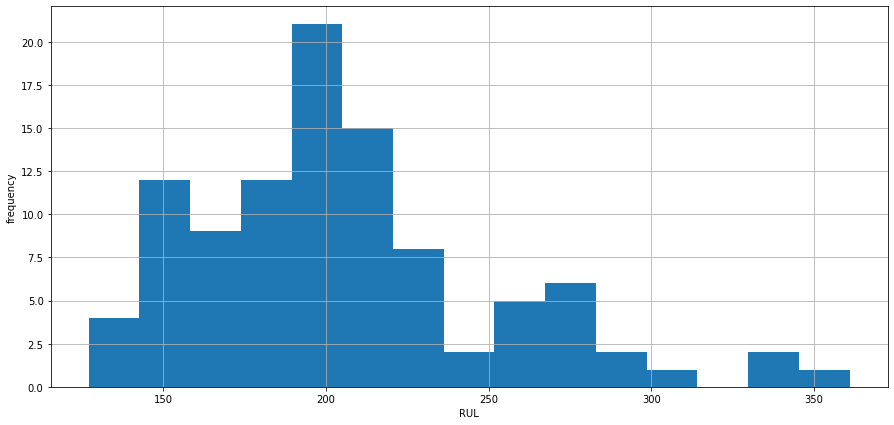

In [22]:
import matplotlib.pyplot as plt
df_max_rul = train[['unit_number', 'RUL']].groupby('unit_number').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

## the highest number of aircrafts break down after 200 cycles

In [13]:
# import true RUL of test data
y_true = pd.read_csv('/Users/vickiyew/Documents/Capstone/Data Set/RUL_FD001.txt',delim_whitespace=True,names=["RUL"])
y_true["unit_number"] = y_true.index
y_true.head()

RUL  unit_number
0  112            0
1   98            1
2   69            2
3   82            3
4   91            4

In [14]:
# check for missing values
train.isnull().sum()

unit_number       0
time_in_cycles    0
setting_1         0
setting_2         0
setting_3         0
s1                0
s2                0
s3                0
s4                0
s5                0
s6                0
s7                0
s8                0
s9                0
s10               0
s11               0
s12               0
s13               0
s14               0
s15               0
s16               0
s17               0
s18               0
s19               0
s20               0
s21               0
RUL               0
dtype: int64

## Exploratory Data Analysis

In [15]:
import pandas as pd
import numpy as np

#to plot the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## correlation matrix 

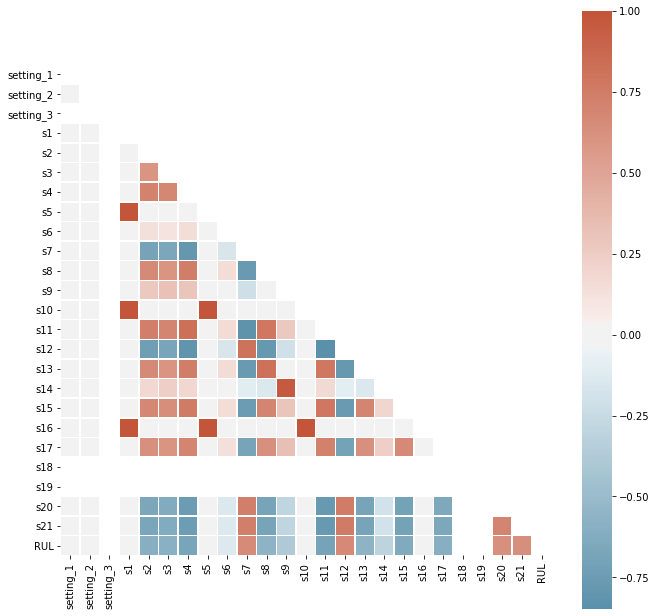

In [29]:
# Compute the correlation matrix

new_train = train.drop(['unit_number', 'time_in_cycles'], axis = 1) 
corr = new_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})

## can see from the corr matrix x-axis that settings 1 to 3 are mostly white. <i.e. settings 1 to 3 have little to no correlation>

In [32]:
# compute correlation numbers
new_train.corr()

setting_1     setting_2  setting_3            s1            s2  \
setting_1  1.000000e+00  1.166044e-02        NaN -1.669929e-16  9.029868e-03   
setting_2  1.166044e-02  1.000000e+00        NaN -6.876180e-16  7.266242e-03   
setting_3           NaN           NaN        NaN           NaN           NaN   
s1        -1.669929e-16 -6.876180e-16        NaN  1.000000e+00  8.476569e-12   
s2         9.029868e-03  7.266242e-03        NaN  8.476569e-12  1.000000e+00   
s3        -5.651101e-03  9.067833e-03        NaN -1.011335e-12  6.026096e-01   
s4         9.543965e-03  1.467284e-02        NaN  5.450136e-14  7.149492e-01   
s5        -3.491551e-18  1.623640e-16        NaN  1.000000e+00  8.475709e-12   
s6        -1.340410e-03  1.435458e-02        NaN  6.935511e-09  1.322425e-01   
s7        -9.437328e-03 -1.667790e-02        NaN  1.765402e-12 -7.021365e-01   
s8        -4.266868e-04  1.328473e-02        NaN -1.911824e-10  6.623250e-01   
s9        -4.278809e-03 -5.424966e-03        NaN  1.244204e-13  2.737642e-01   
s10       -1.225395e-16  7.690888e-16        NaN  1.000000e+00  8.475712e-12   
s11        1.165784e-02  1.169038e-02        NaN  1.109582e-12  7.400200e-01   
s12       -1.490795e-03 -1.092254e-02        NaN -3.973188e-12 -7.245785e-01   
s13        2.317787e-03  1.815635e-02        NaN -1.862063e-11  6.617924e-01   
s14       -4.469388e-03 -6.310324e-03        NaN -1.576482e-12  1.797520e-01   
s15        7.651995e-03  1.415603e-02        NaN  4.884295e-13  6.759752e-01   
s16        7.268383e-17  1.118654e-15        NaN  1.000000e+00  8.476474e-12   
s17        2.599198e-03  1.227979e-02        NaN  1.934015e-14  6.298856e-01   
s18                 NaN           NaN        NaN           NaN           NaN   
s19                 NaN           NaN        NaN           NaN           NaN   
s20       -5.712625e-03 -1.055403e-02        NaN -7.467360e-13 -6.618407e-01   
s21       -1.455862e-02 -7.845559e-03        NaN -5.996745e-13 -6.680502e-01   
RUL       -3.198458e-03 -1.947628e-03        NaN  1.535649e-14 -6.064840e-01   

                     s3            s4            s5            s6  \
setting_1 -5.651101e-03  9.543965e-03 -3.491551e-18 -1.340410e-03   
setting_2  9.067833e-03  1.467284e-02  1.623640e-16  1.435458e-02   
setting_3           NaN           NaN           NaN           NaN   
s1        -1.011335e-12  5.450136e-14  1.000000e+00  6.935511e-09   
s2         6.026096e-01  7.149492e-01  8.475709e-12  1.322425e-01   
s3         1.000000e+00  6.784127e-01 -1.013618e-12  1.160394e-01   
s4         6.784127e-01  1.000000e+00  5.196257e-14  1.504801e-01   
s5        -1.013618e-12  5.196257e-14  1.000000e+00  6.935500e-09   
s6         1.160394e-01  1.504801e-01  6.935500e-09  1.000000e+00   
s7        -6.645953e-01 -7.931296e-01  1.766525e-12 -1.557202e-01   
s8         6.024805e-01  7.468516e-01 -1.911832e-10  1.521606e-01   
s9         3.229644e-01  2.974286e-01  1.239191e-13  1.934724e-02   
s10       -1.013654e-12  5.136299e-14  1.000000e+00  6.935505e-09   
s11        6.959002e-01  8.301357e-01  1.114015e-12  1.600145e-01   
s12       -6.803068e-01 -8.155905e-01 -3.974044e-12 -1.558837e-01   
s13        6.009632e-01  7.451584e-01 -1.862170e-11  1.582762e-01   
s14        2.371373e-01  1.907477e-01 -1.570319e-12 -2.112329e-03   
s15        6.399212e-01  7.584588e-01  4.884926e-13  1.490420e-01   
s16       -1.013957e-12  5.059435e-14  1.000000e+00  6.935514e-09   
s17        6.000172e-01  7.034991e-01  2.048523e-14  1.308096e-01   
s18                 NaN           NaN           NaN           NaN   
s19                 NaN           NaN           NaN           NaN   
s20       -6.259414e-01 -7.480672e-01 -7.449936e-13 -1.414185e-01   
s21       -6.339008e-01 -7.451931e-01 -5.994358e-13 -1.374186e-01   
RUL       -5.845204e-01 -6.789482e-01  1.561885e-14 -1.283484e-01   

                     s7  ...           s13           s14           s15  \
setting_1 -9.437328e-03  ...  2.317787e-03 -4.469388e-03  7.6519

- sensors with high correlation 
- ('sn_1', 'sn_5', 1.0)
- ('sn_1', 'sn_10', 1.0)
- ('sn_1', 'sn_16', 1.0)
- ('sn_5', 'sn_10', 1.0)
- ('sn_5', 'sn_16', 1.0)
- ('sn_9', 'sn_14', 0.9631566003059564)
- ('sn_10', 'sn_16', 1.0)

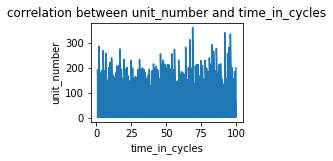

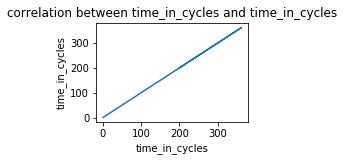

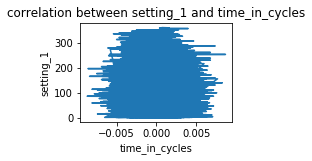

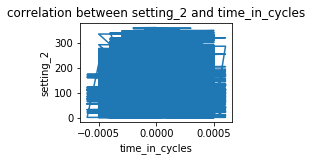

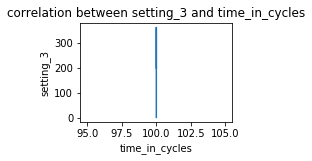

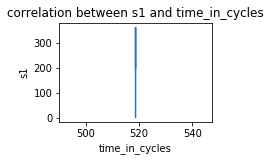

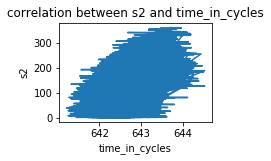

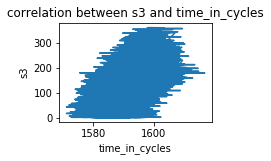

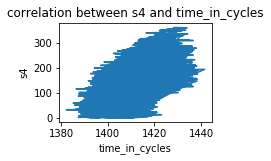

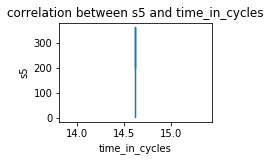

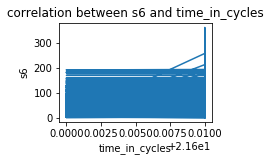

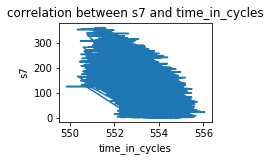

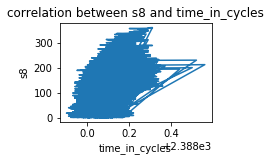

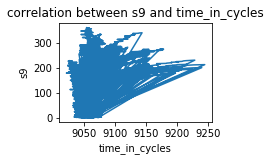

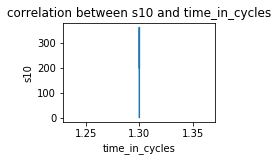

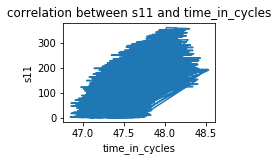

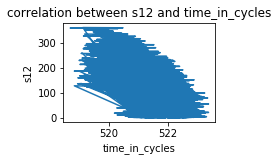

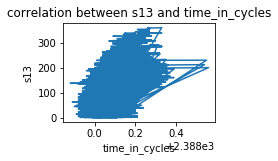

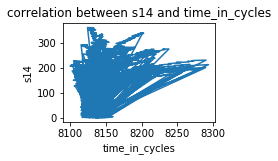

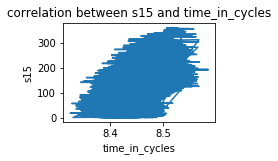

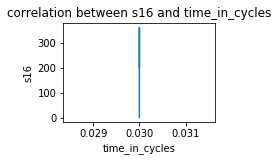

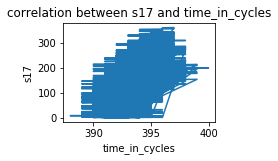

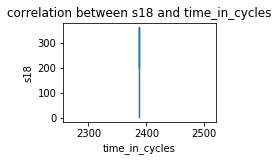

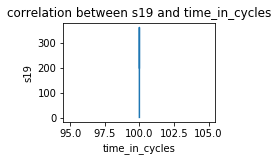

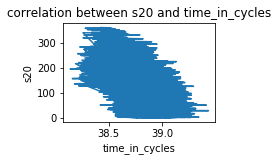

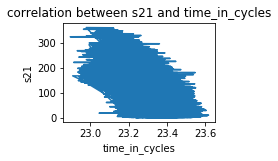

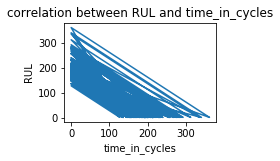

In [50]:
for column in train.columns:
    plt.figure()
    plt.subplot(2, 2, 1)
    plt.plot(train[column], train['time_in_cycles'])
    plt.title('correlation between '+column+' and time_in_cycles')
    plt.xlabel('time_in_cycles')
    plt.ylabel(column)
    plt.show()
    
#columns that can potentially be removed from analysis since they do not change with time 
# ['op_cond_3', 'sn_1', 'sn_5', 'sn_6', 'sn_10', 'sn_16', 'sn_18', 'sn_19']

## Spread of time in cycles amongst units

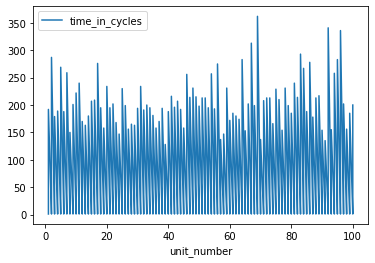

In [26]:
train.plot(x = 'unit_number', y = 'time_in_cycles')

## Operational Settings
- Setting 1, Setting 2 & Setting 3 are the three Operational Settings of the engine

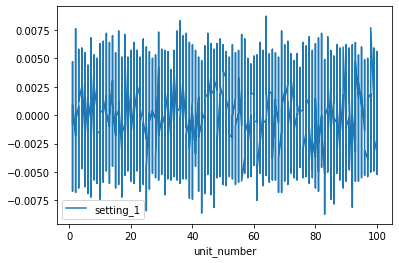

In [97]:
train.plot(x = 'unit_number', y = 'setting_1')

In [27]:
settings = ['setting_1', 'setting_2', 'setting_3']
train[settings].describe()

## by observing the standard deviation of all 3 settings and the training csv file, setting_3 has no variation in our 1st train set.

setting_1     setting_2  setting_3
count  20631.000000  20631.000000    20631.0
mean      -0.000009      0.000002      100.0
std        0.002187      0.000293        0.0
min       -0.008700     -0.000600      100.0
25%       -0.001500     -0.000200      100.0
50%        0.000000      0.000000      100.0
75%        0.001500      0.000300      100.0
max        0.008700      0.000600      100.0

In [28]:
sensors = ['s1','s2','s3','s4','s5','s6','s7','s8',
           's9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
train[sensors].describe().transpose()

count         mean           std        min        25%        50%  \
s1   20631.0   518.670000  6.537152e-11   518.6700   518.6700   518.6700   
s2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
s3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
s4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
s5   20631.0    14.620000  3.394700e-12    14.6200    14.6200    14.6200   
s6   20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
s7   20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
s8   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
s9   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
s10  20631.0     1.300000  4.660829e-13     1.3000     1.3000     1.3000   
s11  20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
s12  20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
s13  20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
s14  20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
s15  20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
s16  20631.0     0.030000  1.556432e-14     0.0300     0.0300     0.0300   
s17  20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
s18  20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
s19  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s20  20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
s21  20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   

           75%        max  
s1    518.6700   518.6700  
s2    643.0000   644.5300  
s3   1594.3800  1616.9100  
s4   1414.5550  1441.4900  
s5     14.6200    14.6200  
s6     21.6100    21.6100  
s7    554.0100   556.0600  
s8   2388.1400  2388.5600  
s9   9069.4200  9244.5900  
s10     1.3000     1.3000  
s11    47.7000    48.5300  
s12   521.9500   523.3800  
s13  2388.1400  2388.5600  
s14  8148.3100  8293.7200  
s15     8.4656     8.5848  
s16     0.0300     0.0300  
s17   394.0000   400.0000  
s18  2388.0000  2388.0000  
s19   100.0000   100.0000  
s20    38.9500    39.4300  
s21    23.3668    23.6184

/Users/vickiyew/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


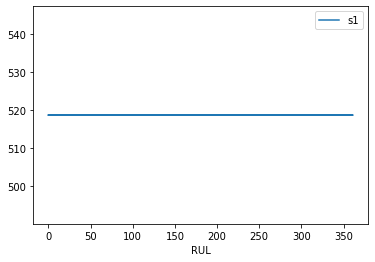

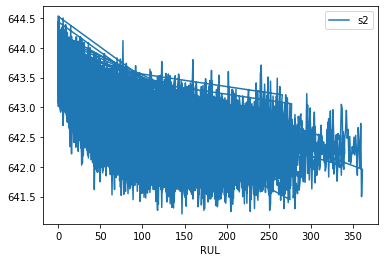

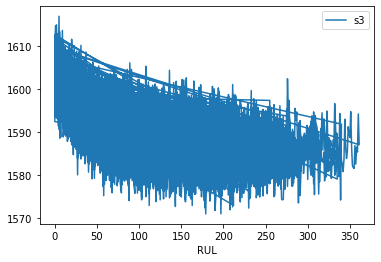

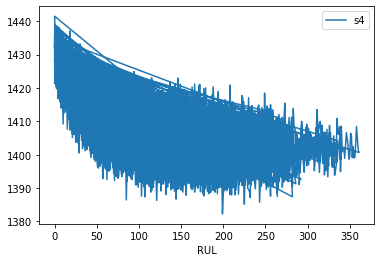

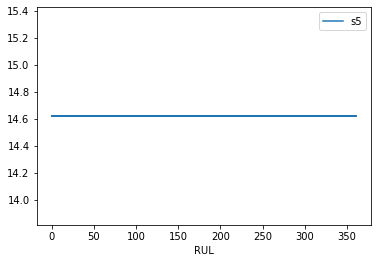

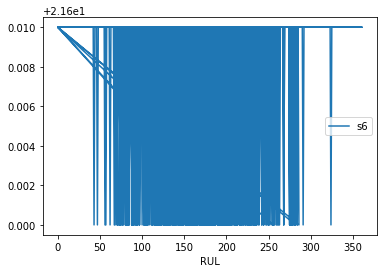

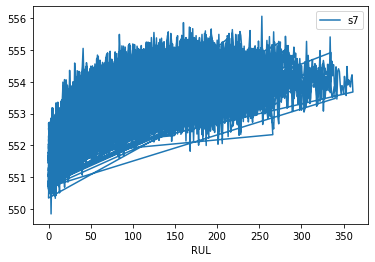

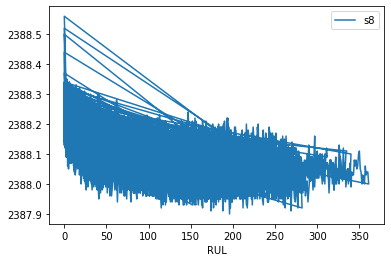

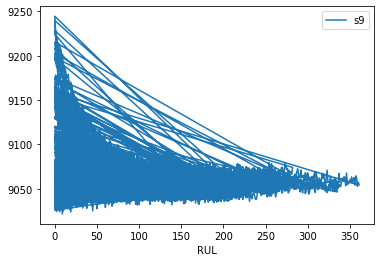

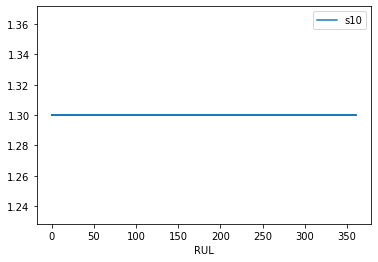

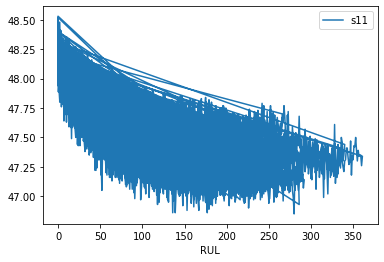

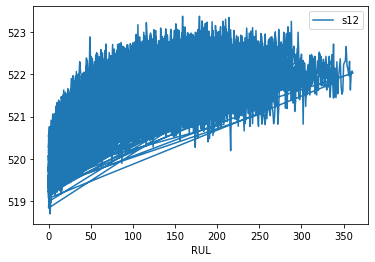

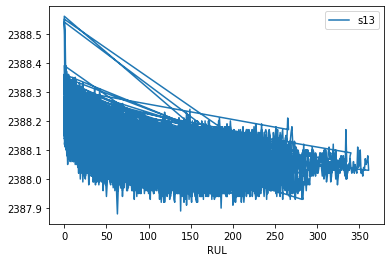

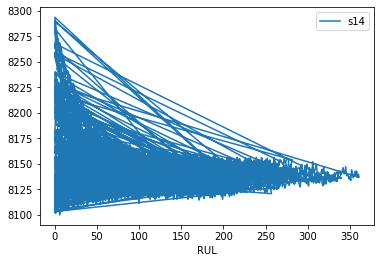

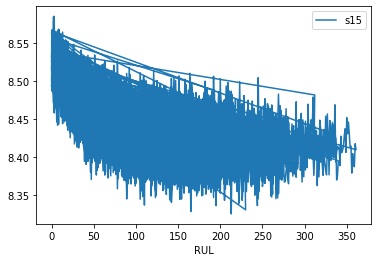

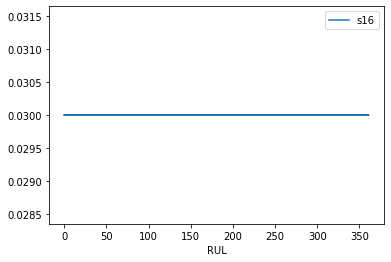

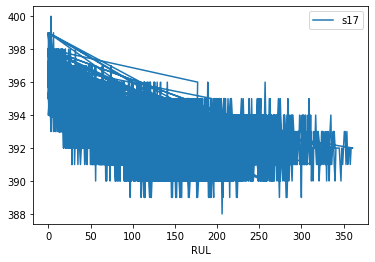

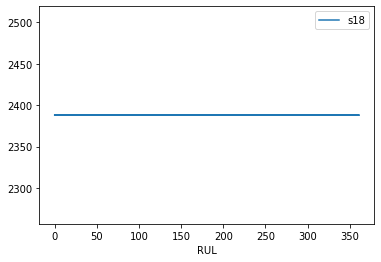

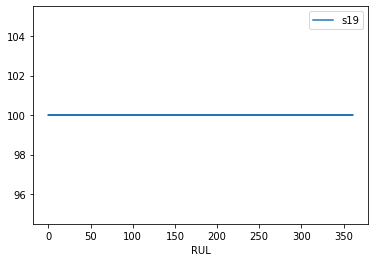

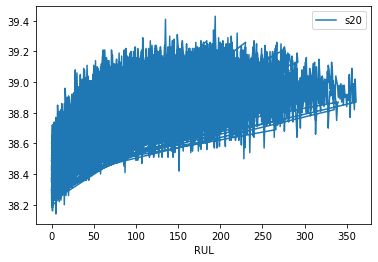

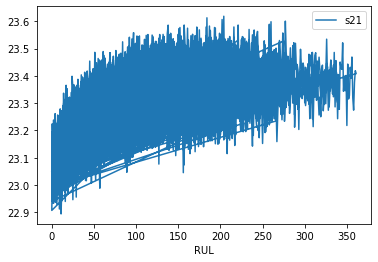

In [101]:
## analyse trends of sensors against RUL
for s in sensors:
    train.plot(x = 'RUL', y = s)

/Users/vickiyew/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/vickiyew/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/vickiyew/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created th

KeyError: 'RUL'

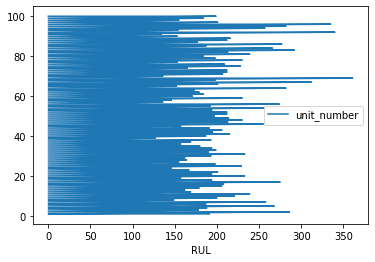

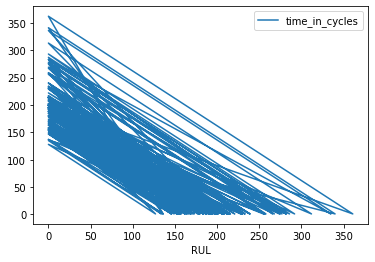

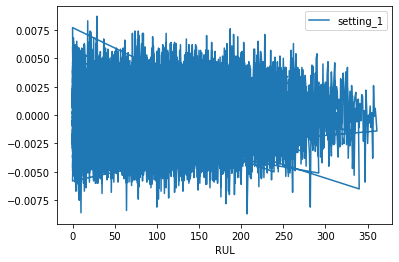

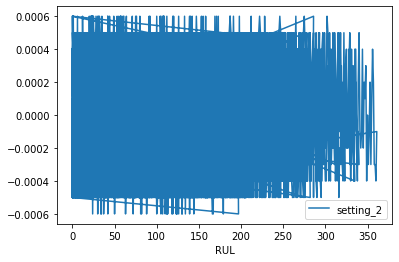

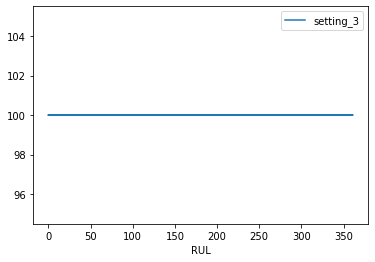

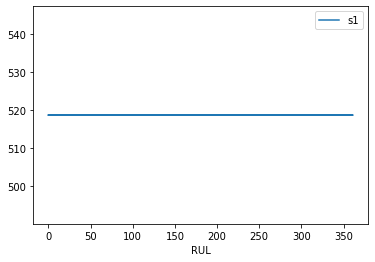

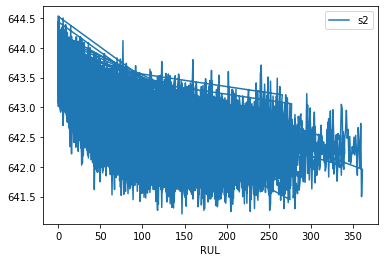

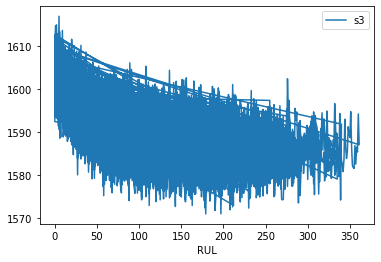

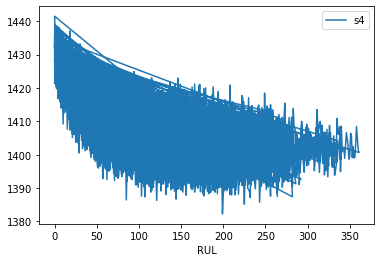

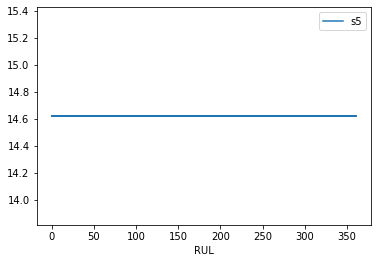

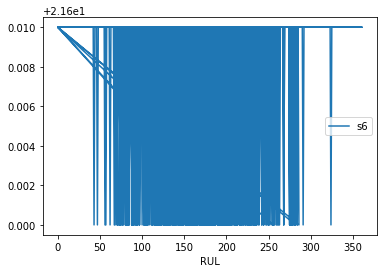

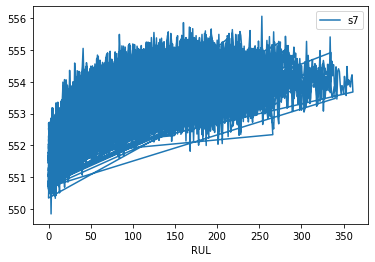

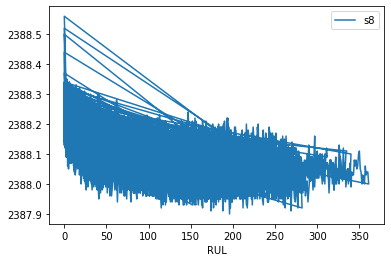

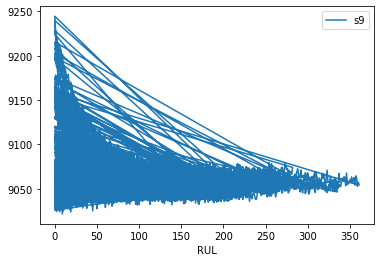

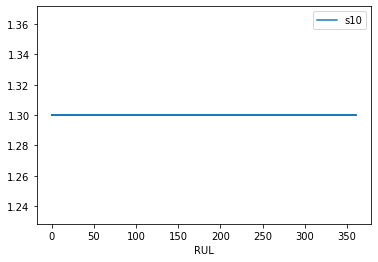

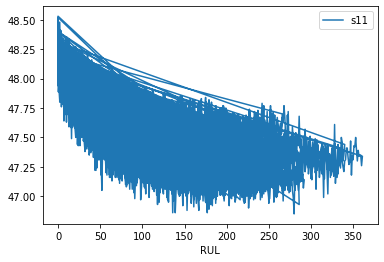

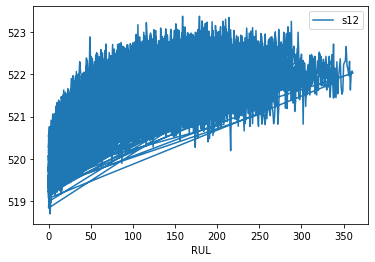

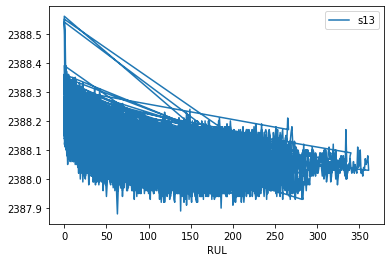

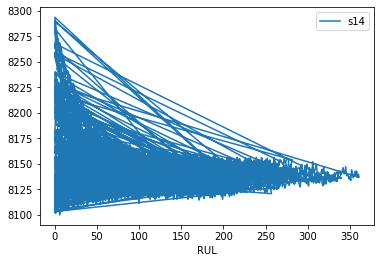

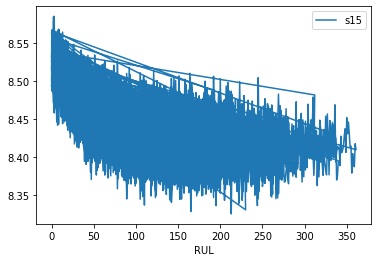

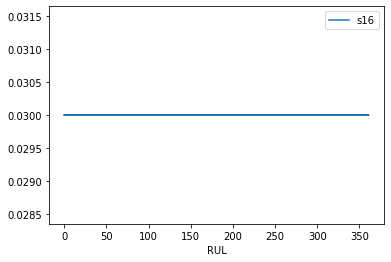

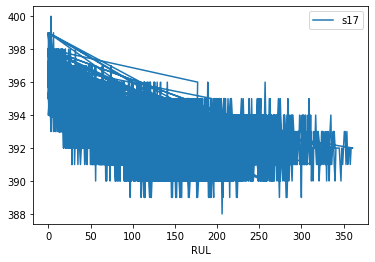

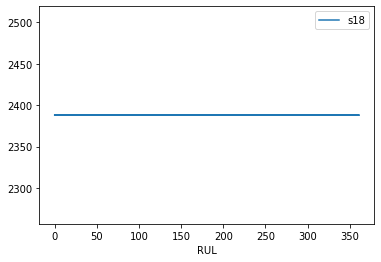

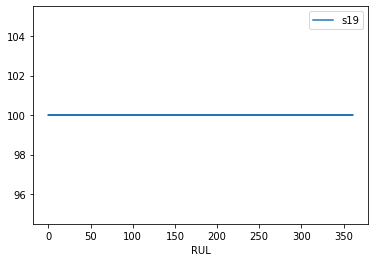

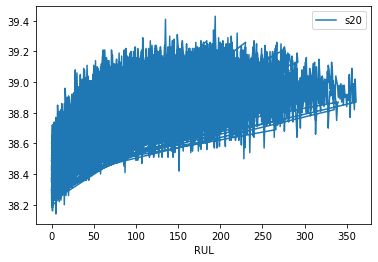

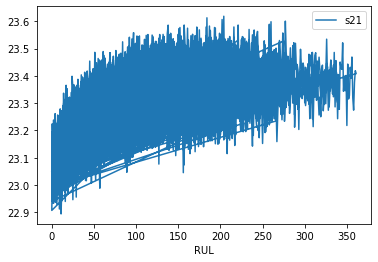

In [52]:
for s in train.columns:
    train.plot(x = 'RUL', y = s)
    
    
# columns [op_cond_1, op_cond_2] do not have an apparent trend toward the end life of the engine. they are just random noise.
# sensors remaining for analysis after considering trends in the time series plot 
#['sn_2' 'sn_3' 'sn_4' 'sn_7' 'sn_8' 'sn_11' 'sn_12' 'sn_13' 'sn_15'
# 'sn_17' 'sn_20' 'sn_21']

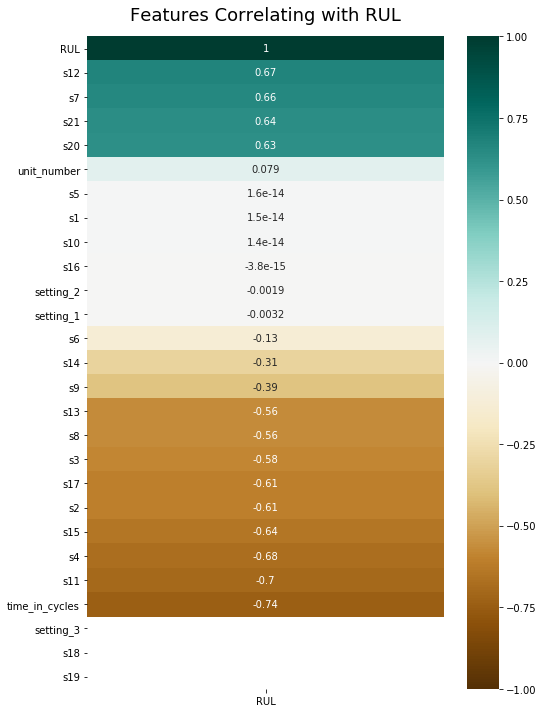

In [49]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['RUL']].sort_values(by='RUL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with RUL', fontdict={'fontsize':18}, pad=16);

## correlation is rather significant 

## Observations of Sensors against RUL
* s1, s5, s10, s16, s18, s19 remain constant across all RUL. This can be confirmed when referencing to the train csv file. 
* s2, s3, s4, s8, s9, s11, s13, s14, s15, s17 show a decreasing trend with RUL.
* s6 has small variation - values vary between 21.61 and 21.6
* s7, s12, s20, s21 show an increasing trend with RUL

thus, s1, s5, s10, s16, s18, s19, setting_3 have no effect on RUL in this train dataset. 

In [16]:
to_drop = ['s1', 's5', 's10', 's16', 's18', 's19', 'setting_3', 'unit_number', 'time_in_cycles']
X_train = train.drop(to_drop, axis = 1)
y_train = X_train.pop('RUL')
X_test = test.groupby('unit_number').last().reset_index().drop(to_drop, axis=1)


## linear regression
- if drop some features 

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [87]:
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

# RMSE is quite high

train set RMSE:44.66035980172265, R2:0.5795961126406306


In [98]:
y_hat_test = lm.predict(X_test)
#y_hat_test.tolist()

In [99]:
y_true['RUL']

0     112
1      98
2      69
3      82
4      91
     ... 
95    137
96     82
97     59
98    117
99     20
Name: RUL, Length: 100, dtype: int64

In [100]:
y_hat_test = lm.predict(X_test)
evaluate(y_true['RUL'].tolist(), y_hat_test)

test set RMSE:32.04109478174791, R2:0.4054954961202899


## Dataset 2

In [17]:
import pandas as pd
train = pd.read_csv('/Users/vickiyew/Documents/Capstone/Data Set/train_FD002.txt',sep=" ",header=None)
test = pd.read_csv('/Users/vickiyew/Documents/Capstone/Data Set/test_FD002.txt',sep=" ",header=None)

In [18]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','setting_3','s1','s2','s3','s4','s5','s6','s7','s8',
           's9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21', "26", "27" ]
train.columns = columns


In [19]:
test.columns = columns
test.head()
len(test)


33991

In [20]:
# since the last 2 columns do not contain any values, drop the columns
train = train.drop(['26', '27'], axis = 1)
test = test.drop(['26', '27'], axis = 1)
train.head()

unit_number  time_in_cycles  setting_1  setting_2  setting_3      s1  \
0            1               1    34.9983     0.8400      100.0  449.44   
1            1               2    41.9982     0.8408      100.0  445.00   
2            1               3    24.9988     0.6218       60.0  462.54   
3            1               4    42.0077     0.8416      100.0  445.00   
4            1               5    25.0005     0.6203       60.0  462.54   

       s2       s3       s4    s5  ...     s12      s13      s14      s15  \
0  555.32  1358.61  1137.23  5.48  ...  183.06  2387.72  8048.56   9.3461   
1  549.90  1353.22  1125.78  3.91  ...  130.42  2387.66  8072.30   9.3774   
2  537.31  1256.76  1047.45  7.05  ...  164.22  2028.03  7864.87  10.8941   
3  549.51  1354.03  1126.38  3.91  ...  130.72  2387.61  8068.66   9.3528   
4  537.07  1257.71  1047.93  7.05  ...  164.31  2028.00  7861.23  10.8963   

    s16  s17   s18     s19    s20     s21  
0  0.02  334  2223  100.00  14.73  8.8071  
1  0.02  330  2212  100.00  10.41  6.2665  
2  0.02  309  1915   84.93  14.08  8.6723  
3  0.02  329  2212  100.00  10.59  6.4701  
4  0.02  309  1915   84.93  14.13  8.5286  

[5 rows x 26 columns]

In [21]:
# calculating RUL
rul = pd.DataFrame(train.groupby('unit_number')['time_in_cycles'].max()).reset_index()
rul.columns = ['unit_number', 'max']
train = train.merge(rul, on=['unit_number'], how='left')
train['RUL'] = train['max'] - train['time_in_cycles']
train.drop('max', axis=1, inplace=True)

train.head()

unit_number  time_in_cycles  setting_1  setting_2  setting_3      s1  \
0            1               1    34.9983     0.8400      100.0  449.44   
1            1               2    41.9982     0.8408      100.0  445.00   
2            1               3    24.9988     0.6218       60.0  462.54   
3            1               4    42.0077     0.8416      100.0  445.00   
4            1               5    25.0005     0.6203       60.0  462.54   

       s2       s3       s4    s5  ...      s13      s14      s15   s16  s17  \
0  555.32  1358.61  1137.23  5.48  ...  2387.72  8048.56   9.3461  0.02  334   
1  549.90  1353.22  1125.78  3.91  ...  2387.66  8072.30   9.3774  0.02  330   
2  537.31  1256.76  1047.45  7.05  ...  2028.03  7864.87  10.8941  0.02  309   
3  549.51  1354.03  1126.38  3.91  ...  2387.61  8068.66   9.3528  0.02  329   
4  537.07  1257.71  1047.93  7.05  ...  2028.00  7861.23  10.8963  0.02  309   

    s18     s19    s20     s21  RUL  
0  2223  100.00  14.73  8.8071  148  
1  2212  100.00  10.41  6.2665  147  
2  1915   84.93  14.08  8.6723  146  
3  2212  100.00  10.59  6.4701  145  
4  1915   84.93  14.13  8.5286  144  

[5 rows x 27 columns]

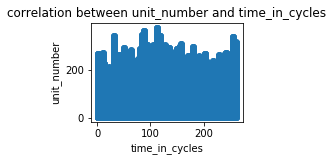

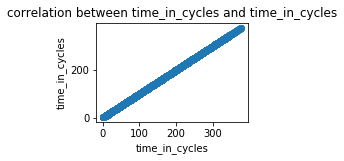

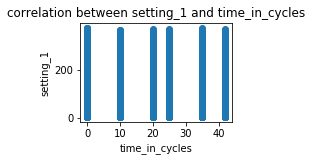

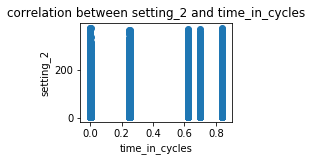

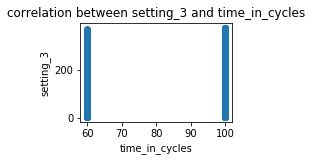

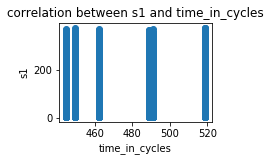

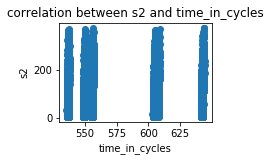

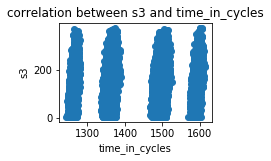

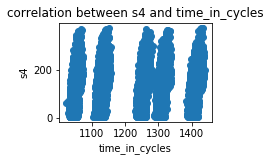

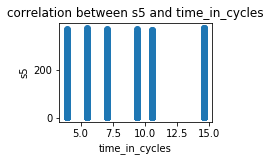

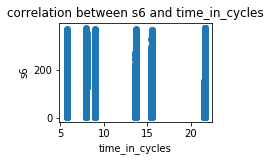

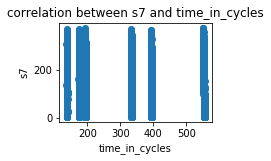

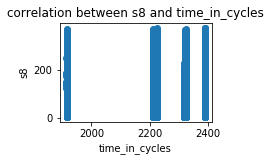

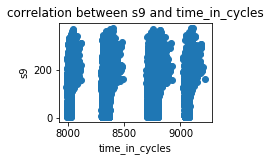

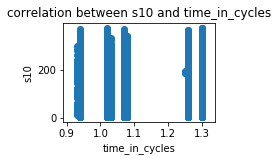

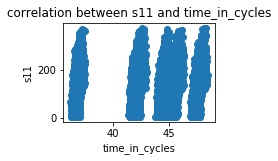

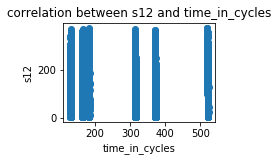

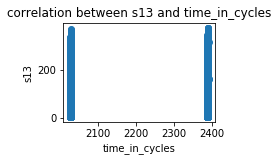

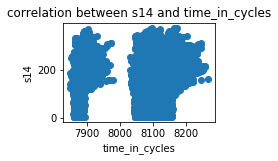

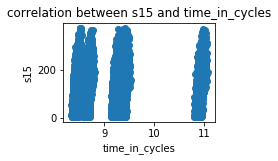

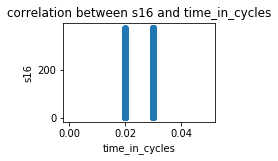

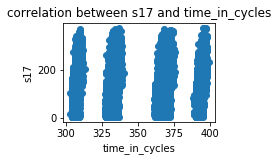

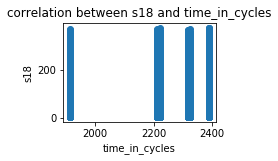

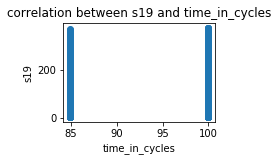

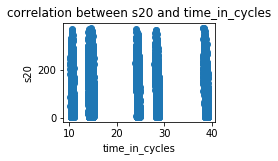

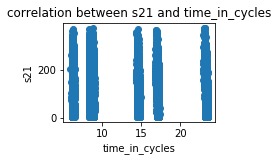

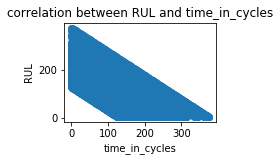

In [22]:
for column in train.columns:
    plt.figure()
    plt.subplot(2, 2, 1)
    plt.scatter(train[column], train['time_in_cycles'])
    plt.title('correlation between '+column+' and time_in_cycles')
    plt.xlabel('time_in_cycles')
    plt.ylabel(column)
    plt.show()
    

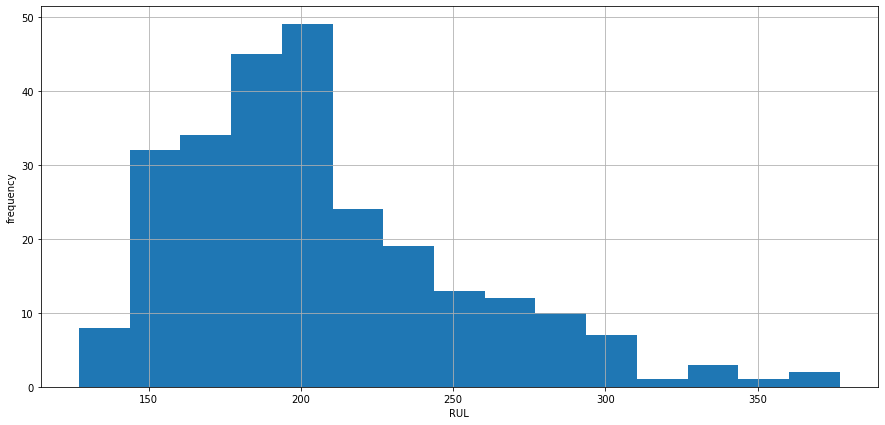

In [107]:
df_max_rul = train[['unit_number', 'RUL']].groupby('unit_number').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

## the highest number of aircrafts break down after 200 cycles

In [136]:
# import true RUL of test data
y_true = pd.read_csv('/Users/vickiyew/Documents/Capstone/Data Set/RUL_FD002.txt',delim_whitespace=True,names=["RUL"])
y_true["unit_number"] = y_true.index
y_true.head()

RUL  unit_number
0   18            0
1   79            1
2  106            2
3  110            3
4   15            4

In [116]:
settings = ['setting_1', 'setting_2', 'setting_3']
train[settings].describe()

## by observing the standard deviation of all 3 settings, all have some variation.

setting_1     setting_2     setting_3
count  53759.000000  53759.000000  53759.000000
mean      23.998407      0.572056     94.046020
std       14.747376      0.310016     14.237735
min        0.000000      0.000000     60.000000
25%       10.004600      0.250700    100.000000
50%       25.001300      0.700000    100.000000
75%       41.998000      0.840000    100.000000
max       42.008000      0.842000    100.000000

In [23]:
sensors = ['s1','s2','s3','s4','s5','s6','s7','s8',
           's9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
train[sensors].describe().transpose()

count         mean         std        min        25%        50%  \
s1   53759.0   472.910207   26.389707   445.0000   445.0000   462.5400   
s2   53759.0   579.672399   37.289399   535.5300   549.5700   555.9800   
s3   53759.0  1419.971013  105.946341  1243.7300  1352.7600  1369.1800   
s4   53759.0  1205.442024  119.123428  1023.7700  1123.6550  1138.8900   
s5   53759.0     8.031986    3.613839     3.9100     3.9100     7.0500   
s6   53759.0    11.600746    5.431802     5.7100     5.7200     9.0300   
s7   53759.0   282.606787  146.005306   136.8000   139.9350   194.6600   
s8   53759.0  2228.879188  145.209816  1914.7700  2211.8800  2223.0700   
s9   53759.0  8525.200837  335.812013  7985.5600  8321.6600  8361.2000   
s10  53759.0     1.094962    0.127469     0.9300     1.0200     1.0200   
s11  53759.0    42.985172    3.232372    36.2300    41.9100    42.3900   
s12  53759.0   266.069034  137.659507   129.1200   131.5200   183.2000   
s13  53759.0  2334.557253  128.068271  2027.6100  2387.9000  2388.0800   
s14  53759.0  8066.597682   84.837950  7848.3600  8062.1400  8082.5400   
s15  53759.0     9.329654    0.749335     8.3357     8.6778     9.3109   
s16  53759.0     0.023326    0.004711     0.0200     0.0200     0.0200   
s17  53759.0   348.309511   27.754515   303.0000   331.0000   335.0000   
s18  53759.0  2228.806358  145.327980  1915.0000  2212.0000  2223.0000   
s19  53759.0    97.756838    5.364067    84.9300   100.0000   100.0000   
s20  53759.0    20.789296    9.869331    10.1800    10.9100    14.8800   
s21  53759.0    12.473423    5.921615     6.0105     6.5463     8.9292   

           75%        max  
s1    491.1900   518.6700  
s2    607.3400   644.5200  
s3   1499.3700  1612.8800  
s4   1306.8500  1439.2300  
s5     10.5200    14.6200  
s6     15.4900    21.6100  
s7    394.0800   555.8200  
s8   2323.9600  2388.3900  
s9   8778.0300  9215.6600  
s10     1.2600     1.3000  
s11    45.3500    48.5100  
s12   371.2600   523.3700  
s13  2388.1700  2390.4800  
s14  8127.1950  8268.5000  
s15     9.3869    11.0669  
s16     0.0300     0.0300  
s17   369.0000   399.0000  
s18  2324.0000  2388.0000  
s19   100.0000   100.0000  
s20    28.4700    39.3400  
s21    17.0832    23.5901

In [37]:
# for more extensive analysis on my local machine
train.to_csv(r'/Users/vickiyew/Documents/Capstone/train_2.csv', index = False, header=True)

/Users/vickiyew/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


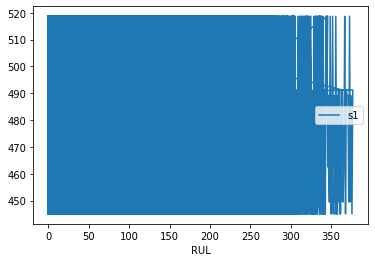

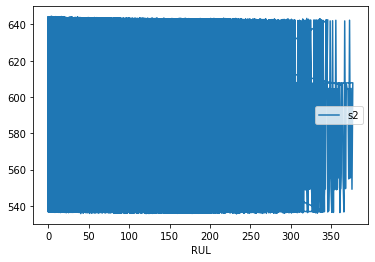

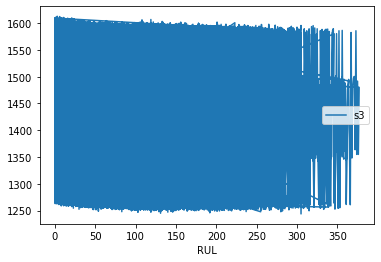

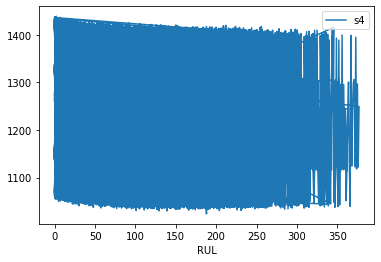

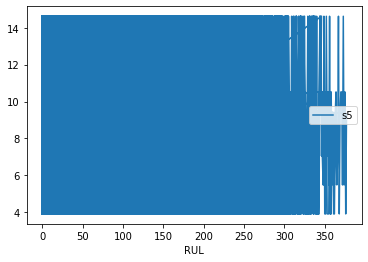

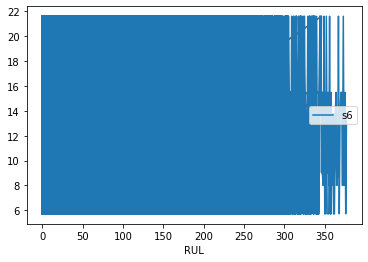

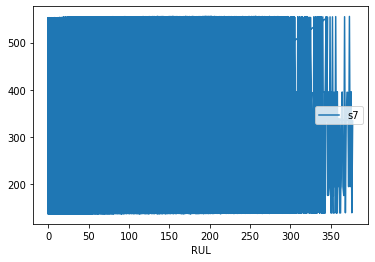

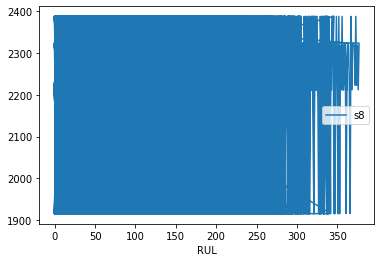

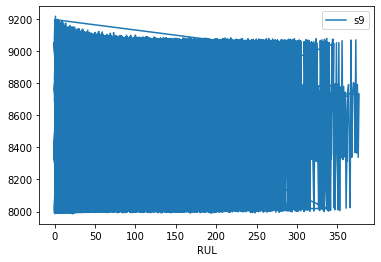

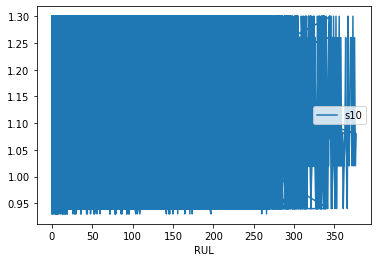

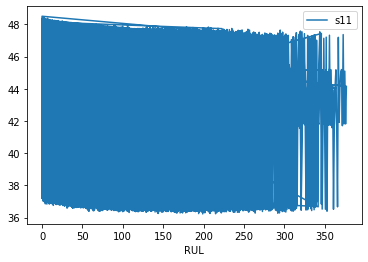

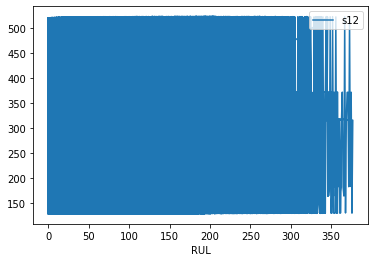

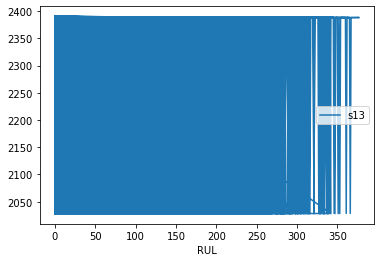

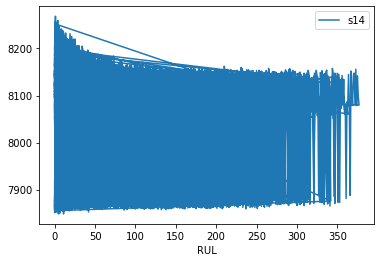

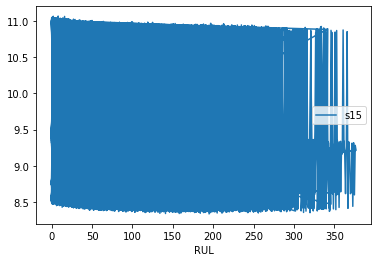

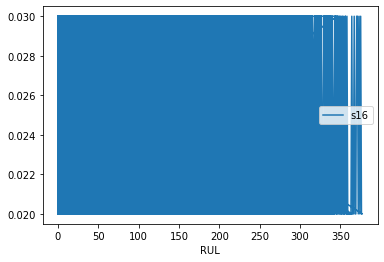

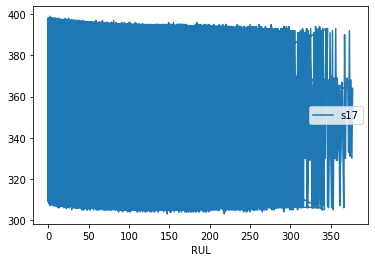

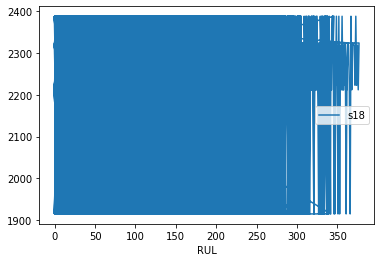

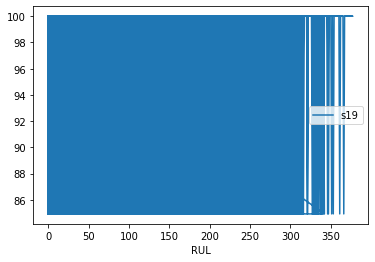

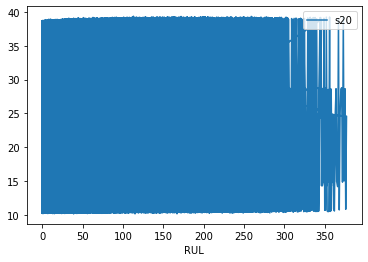

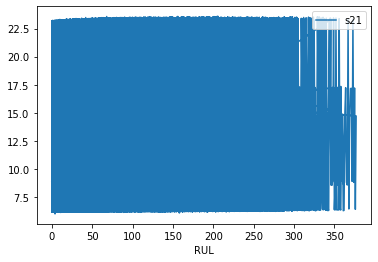

In [25]:
## analyse trends of sensors against RUL
for s in sensors:
    train.plot(x = 'RUL', y = s)

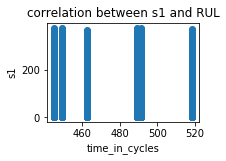

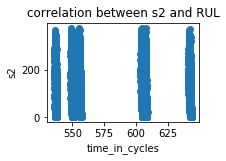

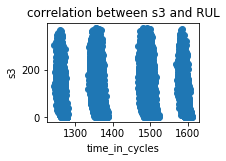

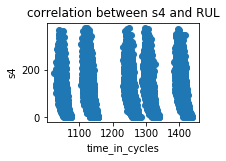

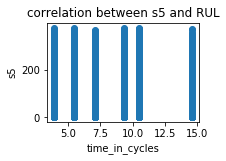

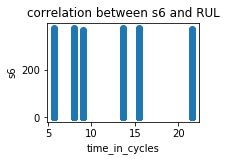

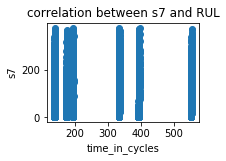

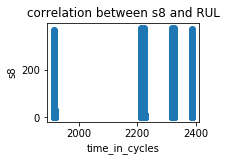

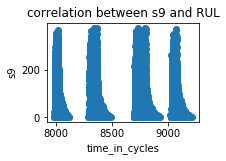

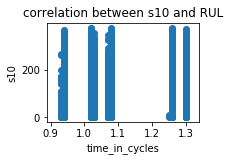

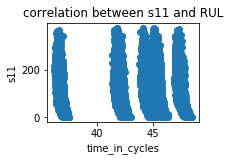

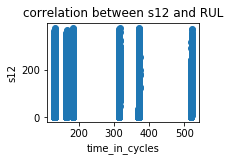

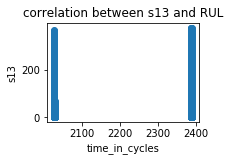

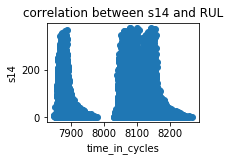

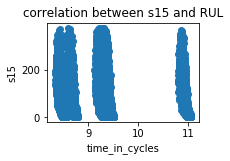

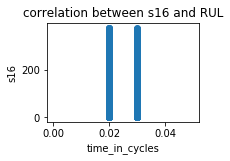

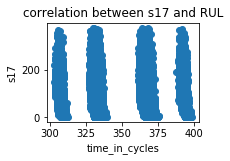

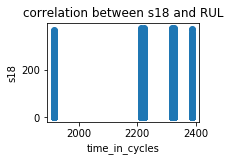

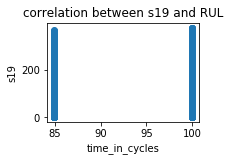

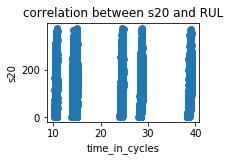

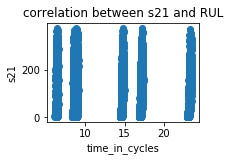

In [27]:
for column in sensors:
    plt.figure()
    plt.subplot(2, 2, 1)
    plt.scatter(train[column], train['RUL'])
    plt.title('correlation between '+column+' and RUL')
    plt.xlabel('time_in_cycles')
    plt.ylabel(column)
    plt.show()

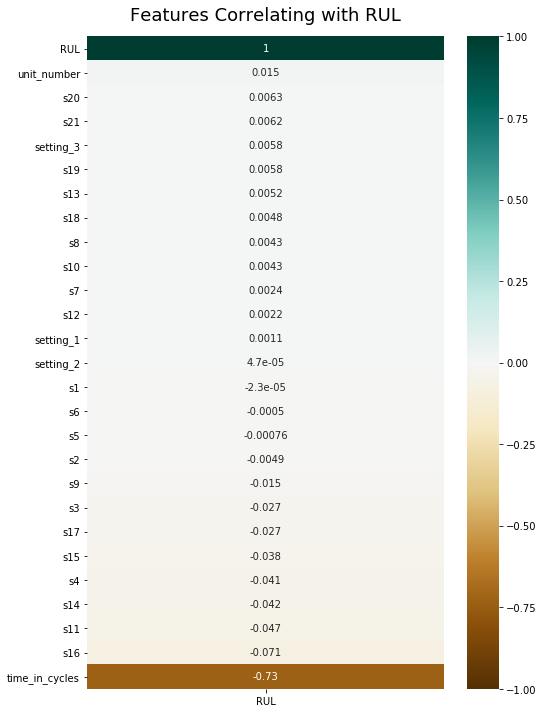

In [55]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['RUL']].sort_values(by='RUL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with RUL', fontdict={'fontsize':18}, pad=16);

## Observations of Sensors against RUL
* all sensors and settings have at least some variation with RUL. 

In [134]:
to_drop = ['unit_number', 'time_in_cycles']
X_train = train.drop(to_drop, axis = 1)
y_train = X_train.pop('RUL')
X_test = test.groupby('unit_number').last().reset_index().drop(to_drop, axis=1)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')




train set RMSE:45.02973737819618, R2:0.576319327768421


In [138]:
y_hat_test = lm.predict(X_test)
evaluate(y_true['RUL'].tolist(), y_hat_test)

test set RMSE:33.94272528221818, R2:0.6016440598064567


## Dataset 3

In [28]:
import pandas as pd
train = pd.read_csv('/Users/vickiyew/Documents/Capstone/Data Set/train_FD003.txt',sep=" ",header=None)
test = pd.read_csv('/Users/vickiyew/Documents/Capstone/Data Set/test_FD003.txt',sep=" ",header=None)

In [29]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','setting_3','s1','s2','s3','s4','s5','s6','s7','s8',
           's9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21', "26", "27" ]
train.columns = columns
test.columns = columns
test.head()

train = train.drop(['26', '27'], axis = 1)
test = test.drop(['26', '27'], axis = 1)

# calculating RUL
rul = pd.DataFrame(train.groupby('unit_number')['time_in_cycles'].max()).reset_index()
rul.columns = ['unit_number', 'max']
train = train.merge(rul, on=['unit_number'], how='left')
train['RUL'] = train['max'] - train['time_in_cycles']
train.drop('max', axis=1, inplace=True)

train.head()

unit_number  time_in_cycles  setting_1  setting_2  setting_3      s1  \
0            1               1    -0.0005     0.0004      100.0  518.67   
1            1               2     0.0008    -0.0003      100.0  518.67   
2            1               3    -0.0014    -0.0002      100.0  518.67   
3            1               4    -0.0020     0.0001      100.0  518.67   
4            1               5     0.0016     0.0000      100.0  518.67   

       s2       s3       s4     s5  ...      s13      s14     s15   s16  s17  \
0  642.36  1583.23  1396.84  14.62  ...  2388.01  8145.32  8.4246  0.03  391   
1  642.50  1584.69  1396.89  14.62  ...  2388.03  8152.85  8.4403  0.03  392   
2  642.18  1582.35  1405.61  14.62  ...  2388.00  8150.17  8.3901  0.03  391   
3  642.92  1585.61  1392.27  14.62  ...  2388.08  8146.56  8.3878  0.03  392   
4  641.68  1588.63  1397.65  14.62  ...  2388.03  8147.80  8.3869  0.03  392   

    s18    s19    s20      s21  RUL  
0  2388  100.0  39.11  23.3537  258  
1  2388  100.0  38.99  23.4491  257  
2  2388  100.0  38.85  23.3669  256  
3  2388  100.0  38.96  23.2951  255  
4  2388  100.0  39.14  23.4583  254  

[5 rows x 27 columns]

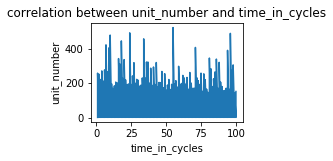

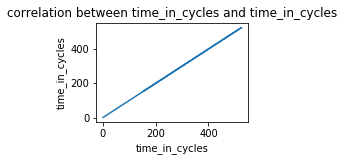

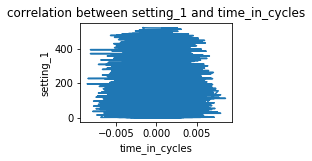

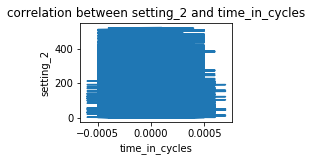

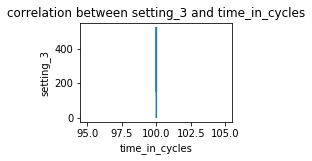

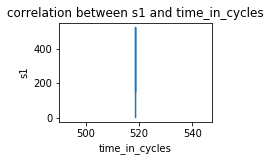

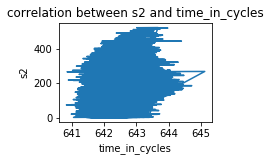

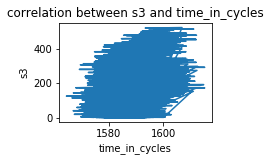

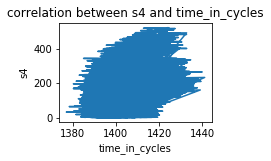

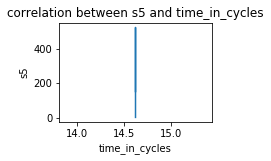

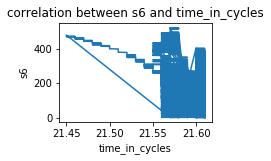

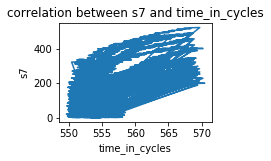

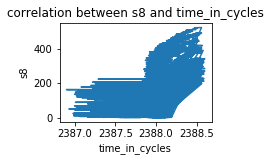

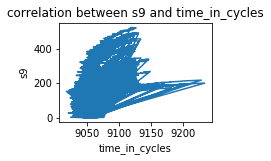

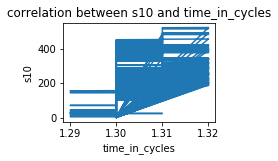

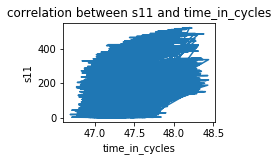

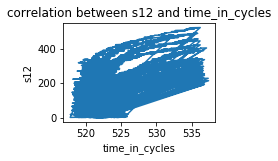

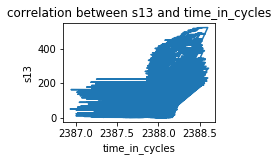

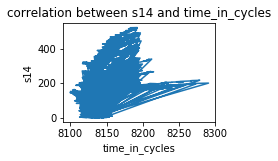

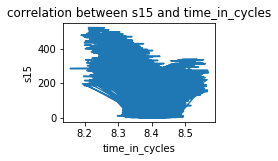

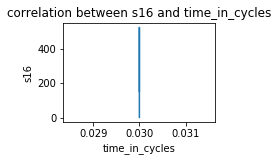

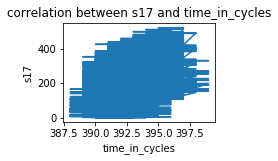

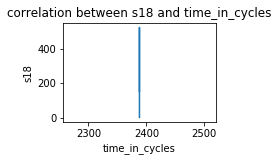

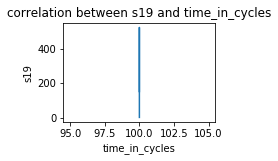

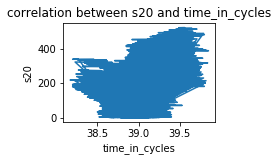

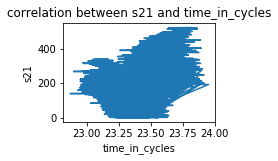

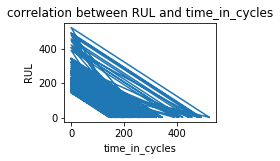

In [61]:
for column in train.columns:
    plt.figure()
    plt.subplot(2, 2, 1)
    plt.plot(train[column], train['time_in_cycles'])
    plt.title('correlation between '+column+' and time_in_cycles')
    plt.xlabel('time_in_cycles')
    plt.ylabel(column)
    plt.show()
    

In [30]:
settings = ['setting_1', 'setting_2', 'setting_3']
train[settings].describe()

## by observing the standard deviation of all 3 settings, TRA has no variation.

setting_1     setting_2  setting_3
count  24720.000000  24720.000000    24720.0
mean      -0.000024      0.000005      100.0
std        0.002194      0.000294        0.0
min       -0.008600     -0.000600      100.0
25%       -0.001500     -0.000200      100.0
50%        0.000000     -0.000000      100.0
75%        0.001500      0.000300      100.0
max        0.008600      0.000700      100.0

In [31]:
sensors = ['s1','s2','s3','s4','s5','s6','s7','s8',
           's9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
train[sensors].describe().transpose()

count         mean           std        min        25%        50%  \
s1   24720.0   518.670000  6.684921e-11   518.6700   518.6700   518.6700   
s2   24720.0   642.457858  5.230311e-01   640.8400   642.0800   642.4000   
s3   24720.0  1588.079175  6.810418e+00  1564.3000  1583.2800  1587.5200   
s4   24720.0  1404.471212  9.773178e+00  1377.0600  1397.1875  1402.9100   
s5   24720.0    14.620000  3.602525e-12    14.6200    14.6200    14.6200   
s6   24720.0    21.595841  1.811600e-02    21.4500    21.5800    21.6000   
s7   24720.0   555.143808  3.437343e+00   549.6100   553.1100   554.0500   
s8   24720.0  2388.071555  1.582849e-01  2386.9000  2388.0000  2388.0700   
s9   24720.0  9064.110809  1.998029e+01  9017.9800  9051.9200  9060.0100   
s10  24720.0     1.301232  3.484849e-03     1.2900     1.3000     1.3000   
s11  24720.0    47.415707  3.000742e-01    46.6900    47.1900    47.3600   
s12  24720.0   523.050873  3.255314e+00   517.7700   521.1500   521.9800   
s13  24720.0  2388.071643  1.581207e-01  2386.9300  2388.0100  2388.0700   
s14  24720.0  8144.202916  1.650412e+01  8099.6800  8134.5100  8141.2000   
s15  24720.0     8.396176  6.051161e-02     8.1563     8.3606     8.3983   
s16  24720.0     0.030000  1.750371e-14     0.0300     0.0300     0.0300   
s17  24720.0   392.566545  1.761459e+00   388.0000   391.0000   392.0000   
s18  24720.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
s19  24720.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s20  24720.0    38.988552  2.488647e-01    38.1700    38.8300    38.9900   
s21  24720.0    23.393024  1.492338e-01    22.8726    23.2962    23.3916   

           75%        max  
s1    518.6700   518.6700  
s2    642.7900   645.1100  
s3   1592.4125  1615.3900  
s4   1410.6000  1441.1600  
s5     14.6200    14.6200  
s6     21.6100    21.6100  
s7    556.0400   570.4900  
s8   2388.1400  2388.6000  
s9   9070.0925  9234.3500  
s10     1.3000     1.3200  
s11    47.6000    48.4400  
s12   523.8400   537.4000  
s13  2388.1400  2388.6100  
s14  8149.2300  8290.5500  
s15     8.4370     8.5705  
s16     0.0300     0.0300  
s17   394.0000   399.0000  
s18  2388.0000  2388.0000  
s19   100.0000   100.0000  
s20    39.1400    39.8500  
s21    23.4833    23.9505

/Users/vickiyew/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


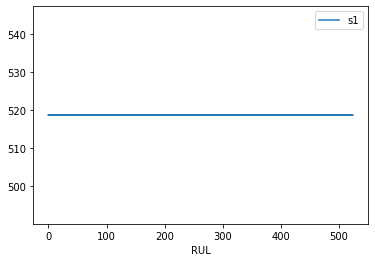

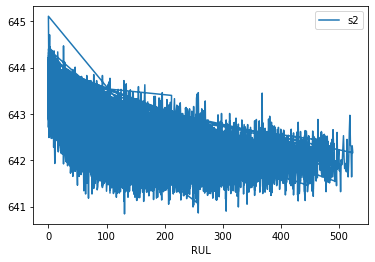

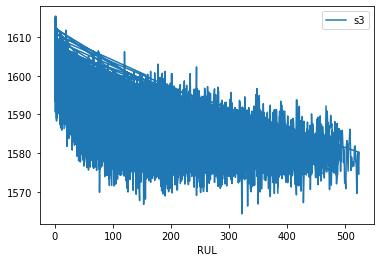

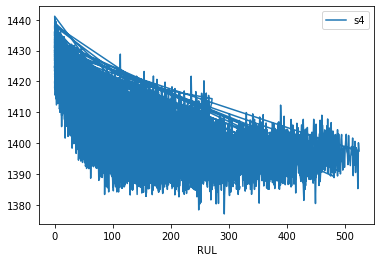

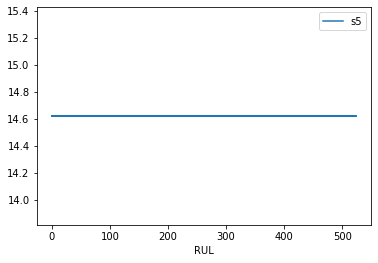

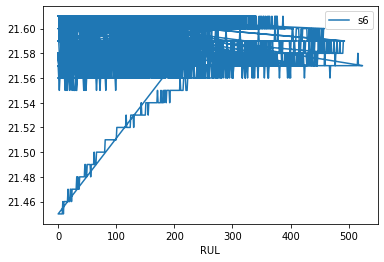

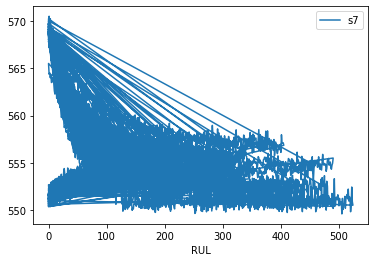

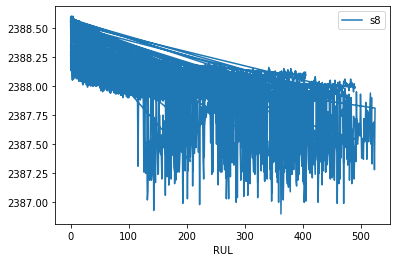

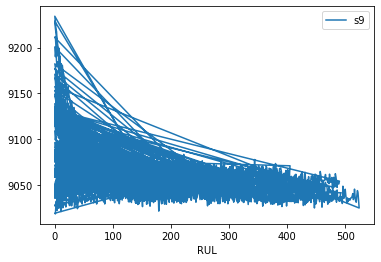

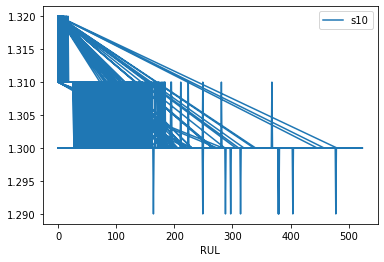

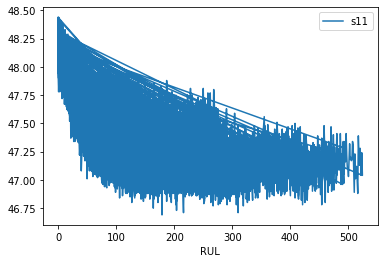

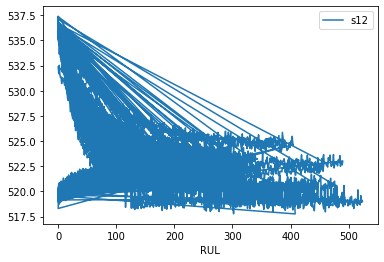

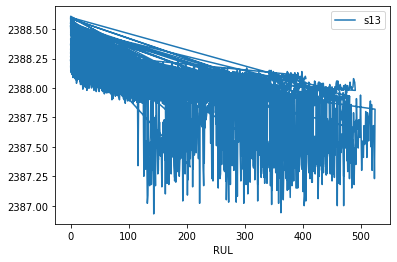

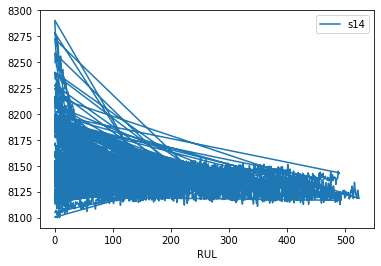

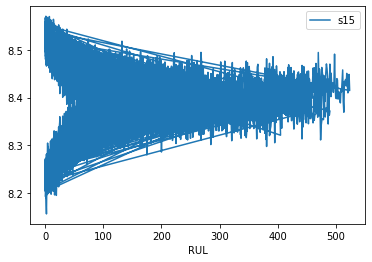

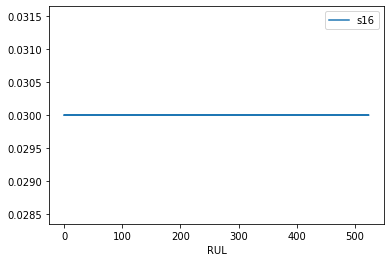

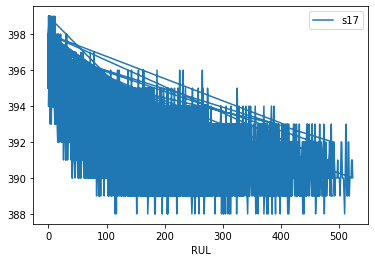

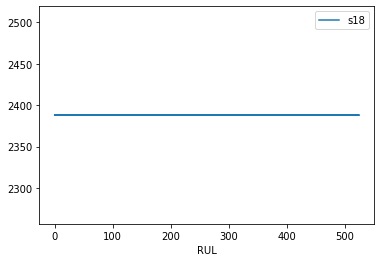

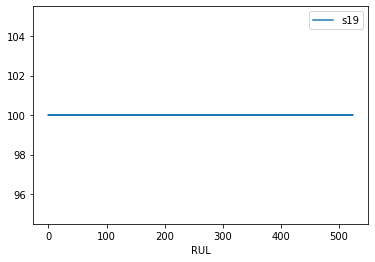

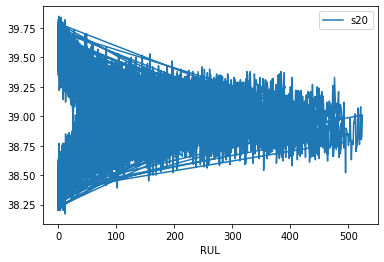

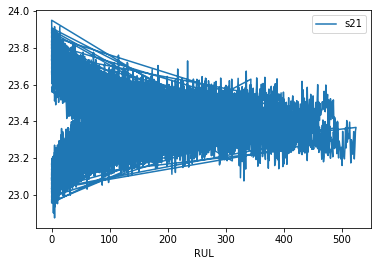

In [116]:
## analyse trends of sensors against RUL
for s in sensors:
    train.plot(x = 'RUL', y = s)
    


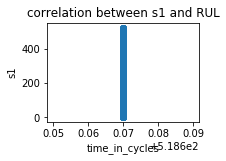

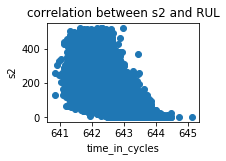

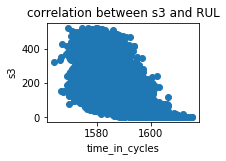

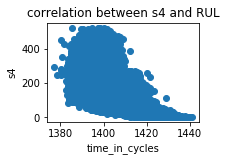

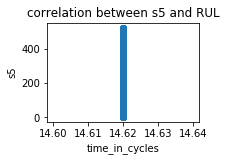

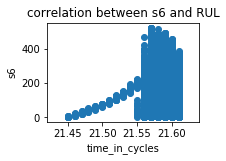

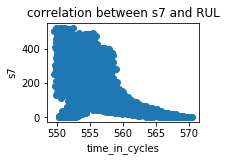

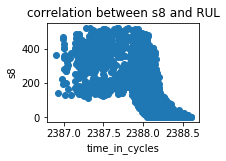

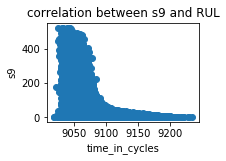

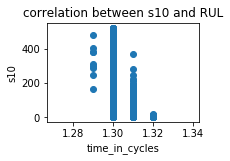

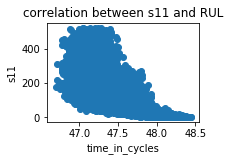

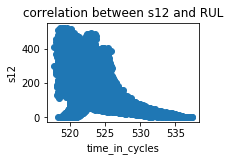

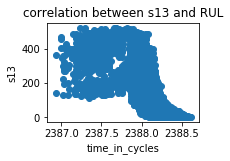

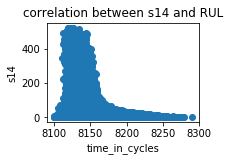

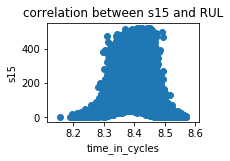

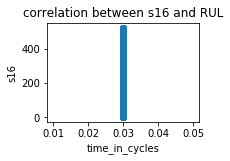

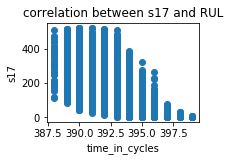

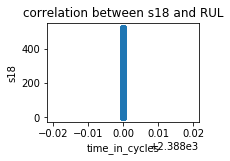

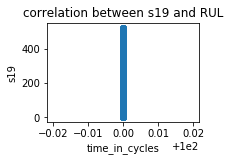

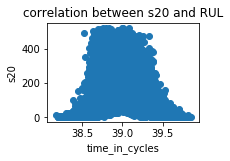

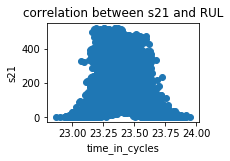

In [32]:
for column in sensors:
    plt.figure()
    plt.subplot(2, 2, 1)
    plt.scatter(train[column], train['RUL'])
    plt.title('correlation between '+column+' and RUL')
    plt.xlabel('time_in_cycles')
    plt.ylabel(column)
    plt.show()

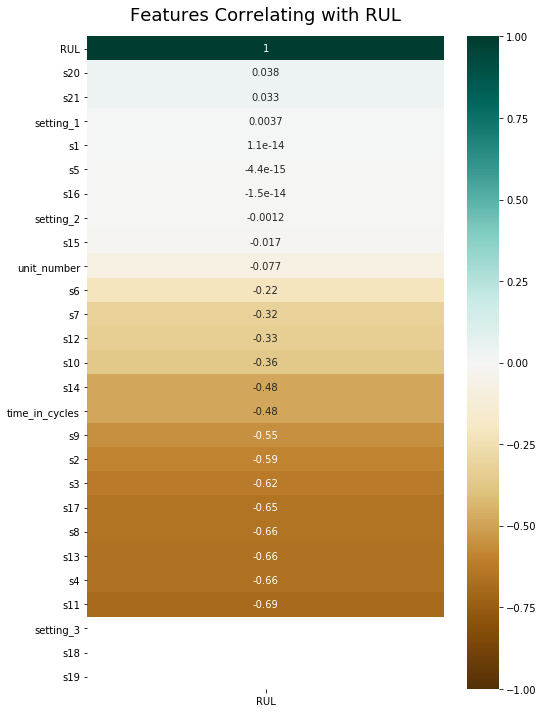

In [63]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['RUL']].sort_values(by='RUL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with RUL', fontdict={'fontsize':18}, pad=16);

## Observations of Sensors against RUL

s1, s5, s16, s18, s19, setting_3 have no effect on RUL in this train dataset. 

In [149]:
# import true RUL of test data
y_true = pd.read_csv('/Users/vickiyew/Documents/Capstone/Data Set/RUL_FD003.txt',delim_whitespace=True,names=["RUL"])
y_true["unit_number"] = y_true.index
y_true.head()

RUL  unit_number
0   44            0
1   51            1
2   27            2
3  120            3
4  101            4

In [150]:
to_drop = ['unit_number', 'time_in_cycles', 's1', 's5', 's16', 's18', 's19', 'setting_3']
X_train = train.drop(to_drop, axis = 1)
y_train = X_train.pop('RUL')
X_test = test.groupby('unit_number').last().reset_index().drop(to_drop, axis=1)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')



train set RMSE:63.49352602554448, R2:0.5873780509052497


In [151]:
y_hat_test = lm.predict(X_test)
evaluate(y_true['RUL'].tolist(), y_hat_test)

test set RMSE:57.07620624040908, R2:-0.9010841978290074


## Dataset 4

In [33]:
import pandas as pd
train = pd.read_csv('/Users/vickiyew/Documents/Capstone/Data Set/train_FD004.txt',sep=" ",header=None)
test = pd.read_csv('/Users/vickiyew/Documents/Capstone/Data Set/test_FD004.txt',sep=" ",header=None)

In [34]:
# import true RUL of test data
y_true = pd.read_csv('/Users/vickiyew/Documents/Capstone/Data Set/RUL_FD004.txt',delim_whitespace=True,names=["RUL"])
y_true["unit_number"] = y_true.index
y_true.head()

RUL  unit_number
0   22            0
1   39            1
2  107            2
3   75            3
4  149            4

In [35]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','setting_3','s1','s2','s3','s4','s5','s6','s7','s8',
           's9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21', "26", "27" ]
train.columns = columns
test.columns = columns
test.head()

train = train.drop(['26', '27'], axis = 1)
test = test.drop(['26', '27'], axis = 1)

# calculating RUL
rul = pd.DataFrame(train.groupby('unit_number')['time_in_cycles'].max()).reset_index()
rul.columns = ['unit_number', 'max']
train = train.merge(rul, on=['unit_number'], how='left')
train['RUL'] = train['max'] - train['time_in_cycles']
train.drop('max', axis=1, inplace=True)

train.head()

unit_number  time_in_cycles  setting_1  setting_2  setting_3      s1  \
0            1               1    42.0049     0.8400      100.0  445.00   
1            1               2    20.0020     0.7002      100.0  491.19   
2            1               3    42.0038     0.8409      100.0  445.00   
3            1               4    42.0000     0.8400      100.0  445.00   
4            1               5    25.0063     0.6207       60.0  462.54   

       s2       s3       s4    s5  ...      s13      s14      s15   s16  s17  \
0  549.68  1343.43  1112.93  3.91  ...  2387.99  8074.83   9.3335  0.02  330   
1  606.07  1477.61  1237.50  9.35  ...  2387.73  8046.13   9.1913  0.02  361   
2  548.95  1343.12  1117.05  3.91  ...  2387.97  8066.62   9.4007  0.02  329   
3  548.70  1341.24  1118.03  3.91  ...  2388.02  8076.05   9.3369  0.02  328   
4  536.10  1255.23  1033.59  7.05  ...  2028.08  7865.80  10.8366  0.02  305   

    s18     s19    s20      s21  RUL  
0  2212  100.00  10.62   6.3670  320  
1  2324  100.00  24.37  14.6552  319  
2  2212  100.00  10.48   6.4213  318  
3  2212  100.00  10.54   6.4176  317  
4  1915   84.93  14.03   8.6754  316  

[5 rows x 27 columns]

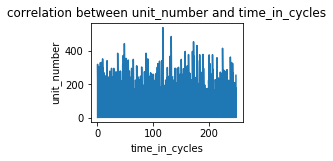

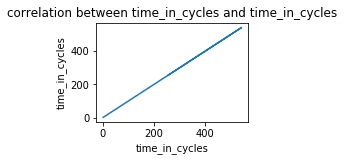

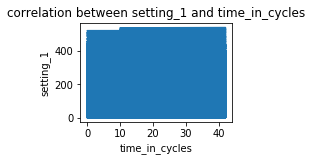

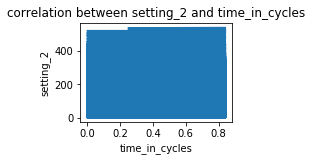

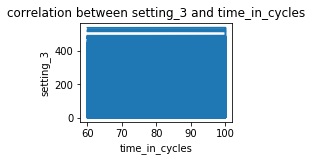

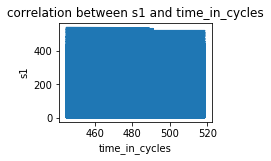

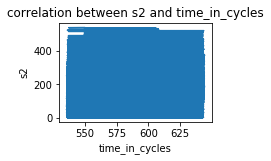

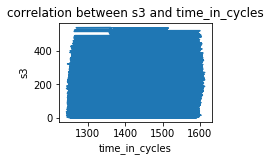

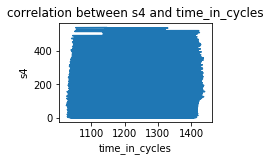

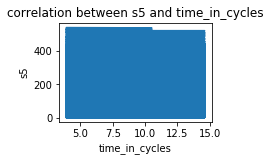

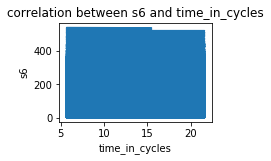

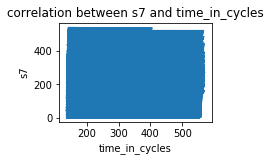

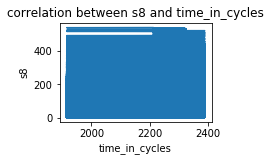

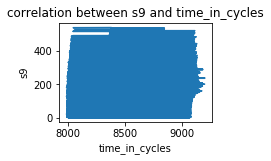

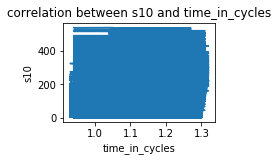

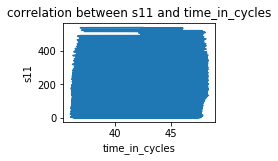

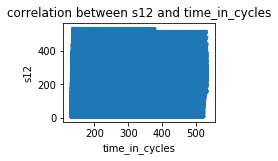

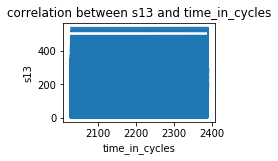

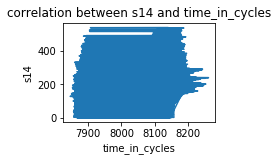

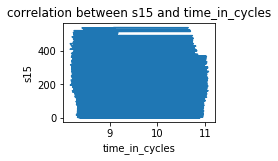

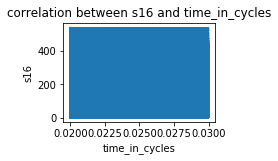

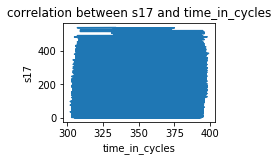

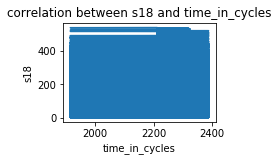

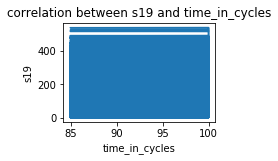

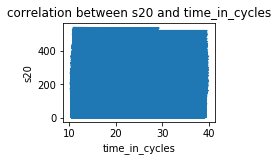

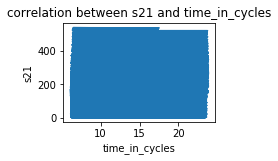

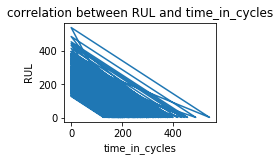

In [65]:
for column in train.columns:
    plt.figure()
    plt.subplot(2, 2, 1)
    plt.plot(train[column], train['time_in_cycles'])
    plt.title('correlation between '+column+' and time_in_cycles')
    plt.xlabel('time_in_cycles')
    plt.ylabel(column)
    plt.show()
    

In [36]:
settings = ['setting_1', 'setting_2', 'setting_3']
train[settings].describe()

## by observing the standard deviation of all 3 settings, all some variation.

setting_1     setting_2     setting_3
count  61249.000000  61249.000000  61249.000000
mean      23.999823      0.571347     94.031576
std       14.780722      0.310703     14.251954
min        0.000000      0.000000     60.000000
25%       10.004600      0.250700    100.000000
50%       25.001400      0.700000    100.000000
75%       41.998100      0.840000    100.000000
max       42.008000      0.842000    100.000000

In [37]:
sensors = ['s1','s2','s3','s4','s5','s6','s7','s8',
           's9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
train[sensors].describe().transpose()

count         mean         std        min        25%        50%  \
s1   61249.0   472.882435   26.436832   445.0000   445.0000   462.5400   
s2   61249.0   579.420056   37.342647   535.4800   549.3300   555.7400   
s3   61249.0  1417.896600  106.167598  1242.6700  1350.5500  1367.6800   
s4   61249.0  1201.915359  119.327591  1024.4200  1119.4900  1136.9200   
s5   61249.0     8.031626    3.622872     3.9100     3.9100     7.0500   
s6   61249.0    11.589457    5.444017     5.6700     5.7200     9.0300   
s7   61249.0   283.328633  146.880210   136.1700   142.9200   194.9600   
s8   61249.0  2228.686034  145.348243  1914.7200  2211.9500  2223.0700   
s9   61249.0  8524.673301  336.927547  7984.5100  8320.5900  8362.7600   
s10  61249.0     1.096445    0.127681     0.9300     1.0200     1.0300   
s11  61249.0    42.874529    3.243492    36.0400    41.7600    42.3300   
s12  61249.0   266.735665  138.479109   128.3100   134.5200   183.4500   
s13  61249.0  2334.427590  128.197859  2027.5700  2387.9100  2388.0600   
s14  61249.0  8067.811812   85.670543  7845.7800  8062.6300  8083.8100   
s15  61249.0     9.285604    0.750374     8.1757     8.6480     9.2556   
s16  61249.0     0.023252    0.004685     0.0200     0.0200     0.0200   
s17  61249.0   347.760029   27.808283   302.0000   330.0000   334.0000   
s18  61249.0  2228.613283  145.472491  1915.0000  2212.0000  2223.0000   
s19  61249.0    97.751396    5.369424    84.9300   100.0000   100.0000   
s20  61249.0    20.864333    9.936396    10.1600    10.9400    14.9300   
s21  61249.0    12.518995    5.962697     6.0843     6.5661     8.9601   

           75%        max  
s1    491.1900   518.6700  
s2    607.0700   644.4200  
s3   1497.4200  1613.0000  
s4   1302.6200  1440.7700  
s5     10.5200    14.6200  
s6     15.4800    21.6100  
s7    394.2800   570.8100  
s8   2323.9300  2388.6400  
s9   8777.2500  9196.8100  
s10     1.2600     1.3200  
s11    45.2200    48.3600  
s12   371.4000   537.4900  
s13  2388.1700  2390.4900  
s14  8128.3500  8261.6500  
s15     9.3658    11.0663  
s16     0.0300     0.0300  
s17   368.0000   399.0000  
s18  2324.0000  2388.0000  
s19   100.0000   100.0000  
s20    28.5600    39.8900  
s21    17.1355    23.8852

/Users/vickiyew/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


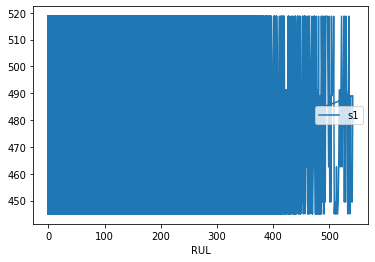

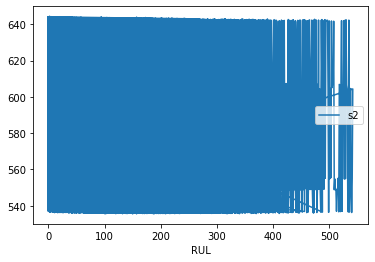

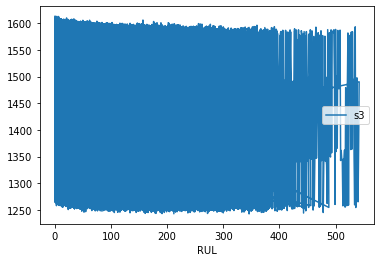

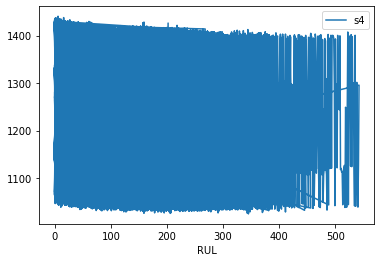

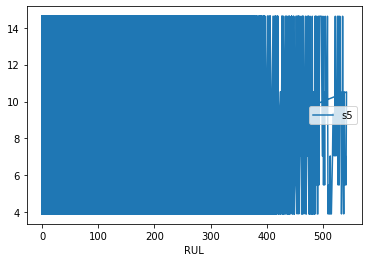

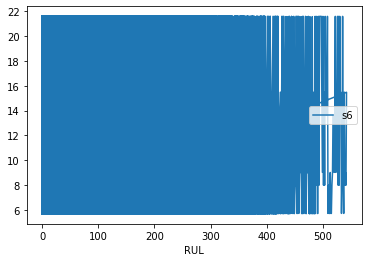

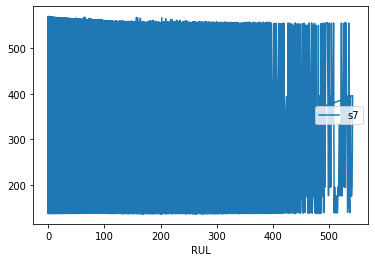

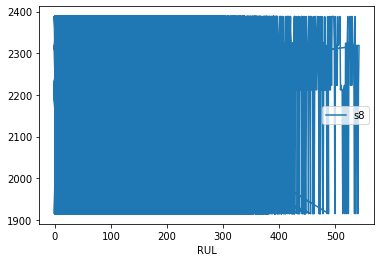

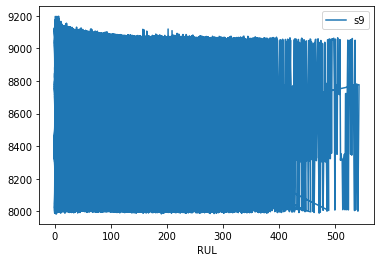

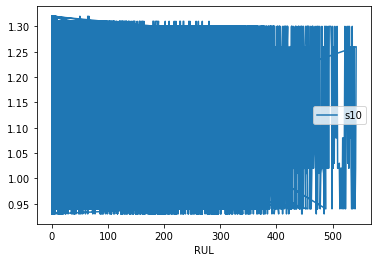

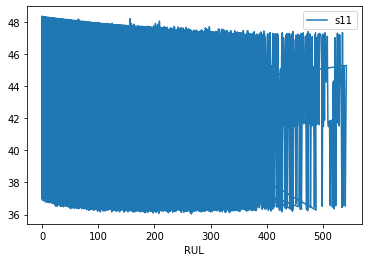

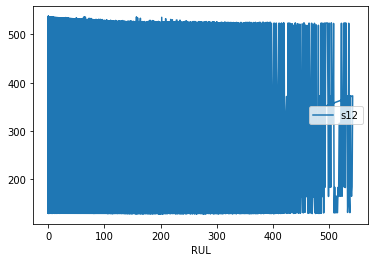

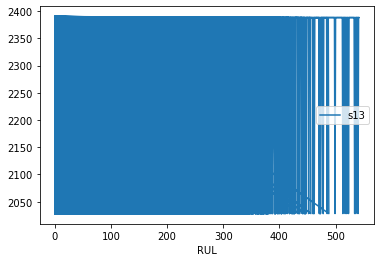

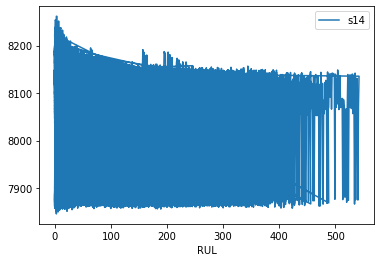

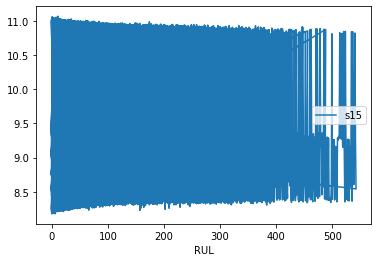

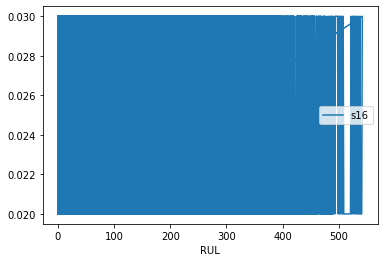

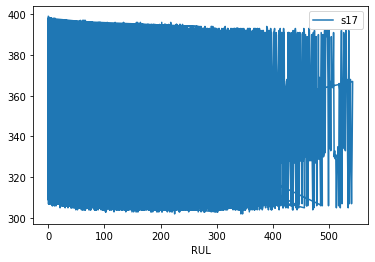

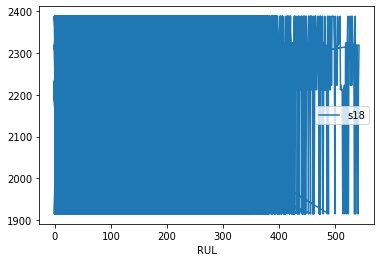

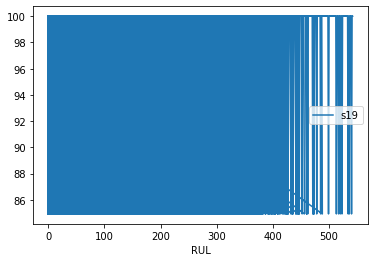

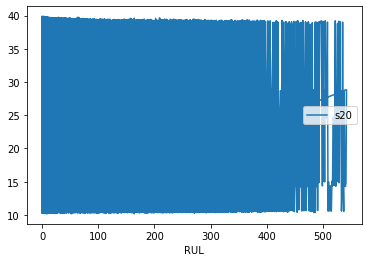

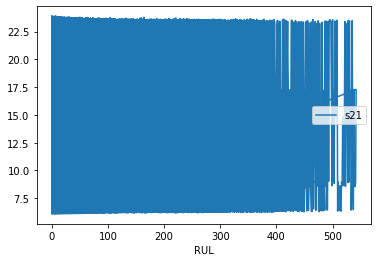

In [121]:
## analyse trends of sensors against RUL
for s in sensors:
    train.plot(x = 'RUL', y = s)

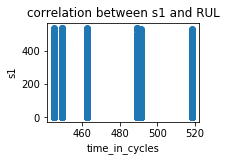

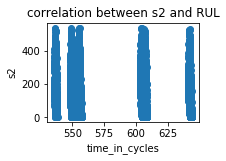

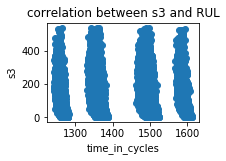

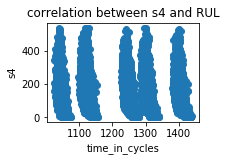

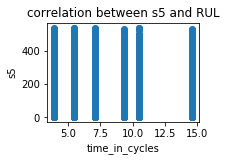

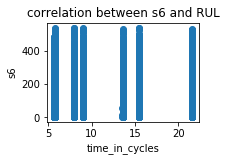

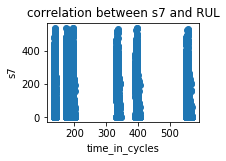

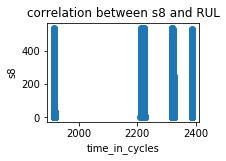

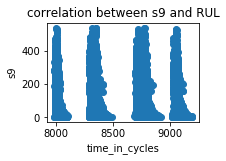

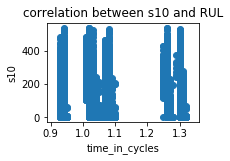

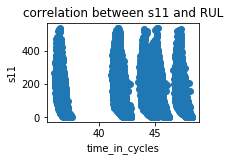

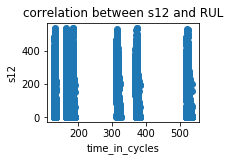

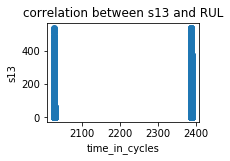

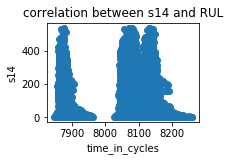

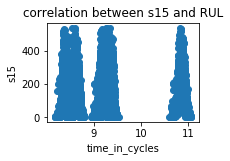

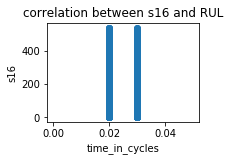

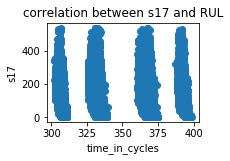

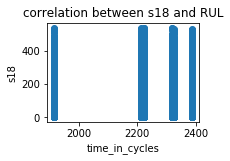

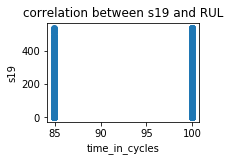

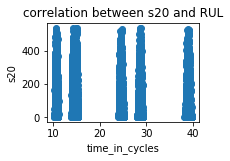

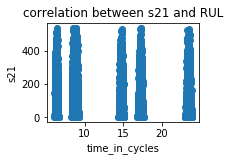

In [38]:
for column in sensors:
    plt.figure()
    plt.subplot(2, 2, 1)
    plt.scatter(train[column], train['RUL'])
    plt.title('correlation between '+column+' and RUL')
    plt.xlabel('time_in_cycles')
    plt.ylabel(column)
    plt.show()

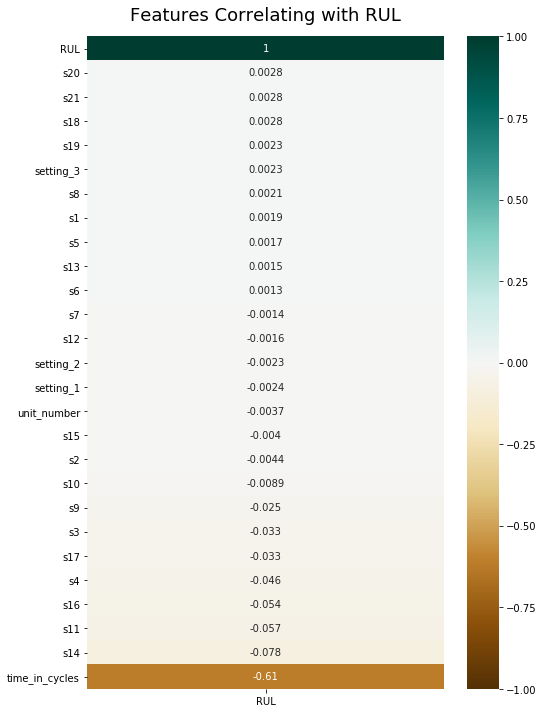

In [70]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['RUL']].sort_values(by='RUL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with RUL', fontdict={'fontsize':18}, pad=16);

## Observations of Sensors against RUL
* all sensors and settings have at least some variation with RUL. 

In [155]:
to_drop = ['unit_number', 'time_in_cycles']
X_train = train.drop(to_drop, axis = 1)
y_train = X_train.pop('RUL')
X_test = test.groupby('unit_number').last().reset_index().drop(to_drop, axis=1)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')



train set RMSE:60.28599555343616, R2:0.5491334954684737


In [156]:
y_hat_test = lm.predict(X_test)
evaluate(y_true['RUL'].tolist(), y_hat_test)

test set RMSE:47.75764832870939, R2:0.23279090539877445
